In [2]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('llama3_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4         5         6  \
0 -4.244676  0.158452 -0.522236  1.353504  2.193724  0.145882 -6.365787   
1 -3.065037 -2.881414 -2.914850  1.339224  3.417422 -0.932629 -4.233596   
2 -3.070732 -1.428018 -2.216700 -0.479143  1.906533  0.602597 -6.083628   
3 -2.622239 -0.632561 -2.342142  1.255207  2.926512  1.542105 -3.420081   
4 -3.394191 -2.501421 -1.145692  0.908666  2.547087  1.741781 -6.980056   

          7         8         9  ...      4087      4088      4089      4090  \
0 -1.149827 -0.090420 -0.994674  ... -1.818620  0.524027 -0.807134 -0.076393   
1 -0.735670  0.180235 -1.141080  ... -0.330858  4.040226 -1.503410 -2.323024   
2  0.049164  0.890967 -0.645944  ... -0.898792 -0.514321  0.034328  1.872394   
3 -0.032691 -1.680992 -0.228052  ... -1.629191  1.218113 -3.200677 -2.671441   
4 -1.554243  0.560733 -1.513486  ... -1.310632 -0.494473  0.892572  0.887475   

       4091      4092      4093      4094      4095      cat_one_hot

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [4]:
def knn_classification(dataset,n_neighbors,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Entrenar el modelo de regresión logística
        modelo_knn.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_knn.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_llama3_embeddings_val_simple_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/KNN_llama3_embeddings_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_knn, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_llama3_embeddings_val_cruz_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/KNN_llama3_embeddings_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_simple_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.1.png


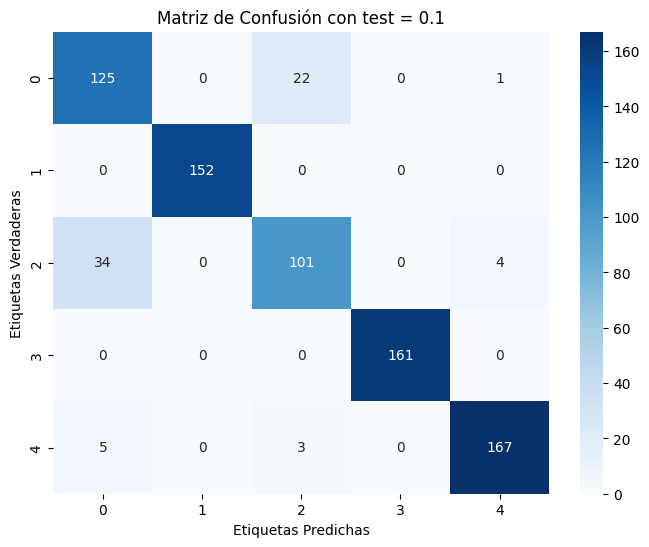

Exactitud del modelo: 0.9109677419354839
Precisión del modelo: 0.912436520860761
Recall del modelo: 0.9109677419354839
Puntuación F1 del modelo: 0.9109525994909133
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.2.png


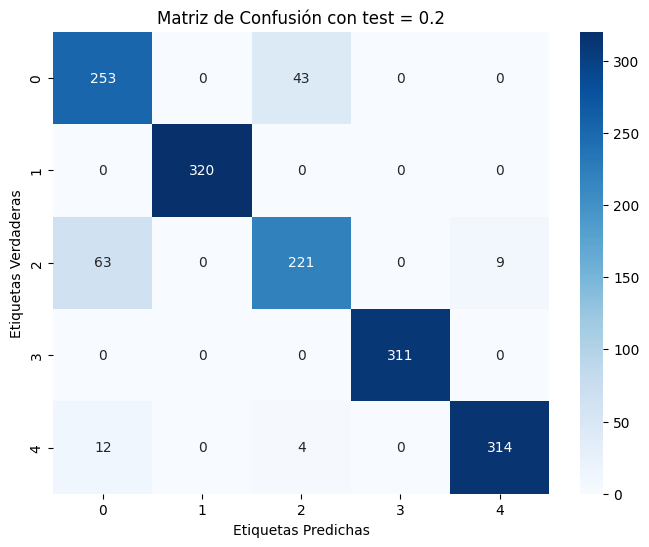

Exactitud del modelo: 0.915483870967742
Precisión del modelo: 0.9172501279825125
Recall del modelo: 0.915483870967742
Puntuación F1 del modelo: 0.9156387928625246
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.3.png


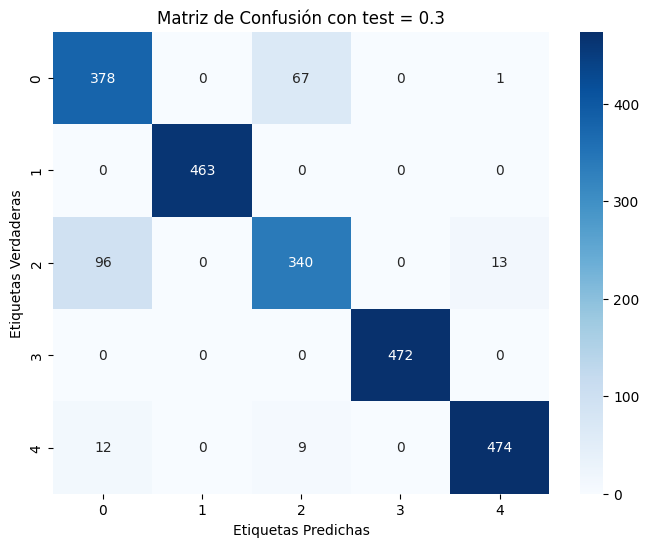

Exactitud del modelo: 0.9148387096774193
Precisión del modelo: 0.9159824615324351
Recall del modelo: 0.9148387096774193
Puntuación F1 del modelo: 0.9148917435636473
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.4.png


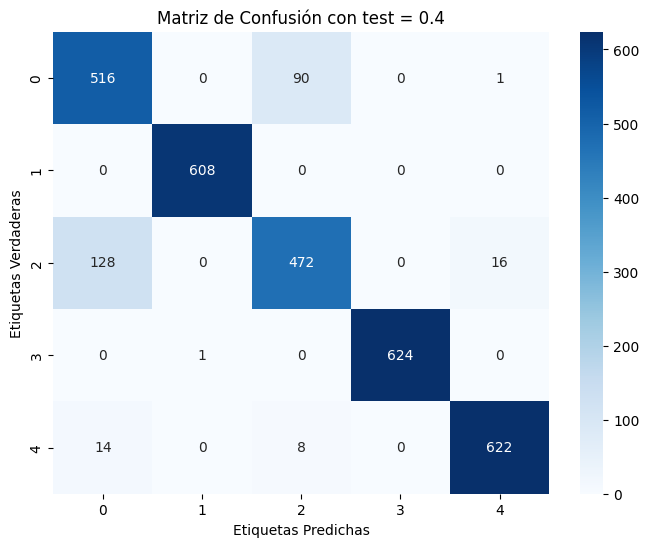

Exactitud del modelo: 0.9167741935483871
Precisión del modelo: 0.9177309447707638
Recall del modelo: 0.9167741935483871
Puntuación F1 del modelo: 0.916750893129924
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.5.png


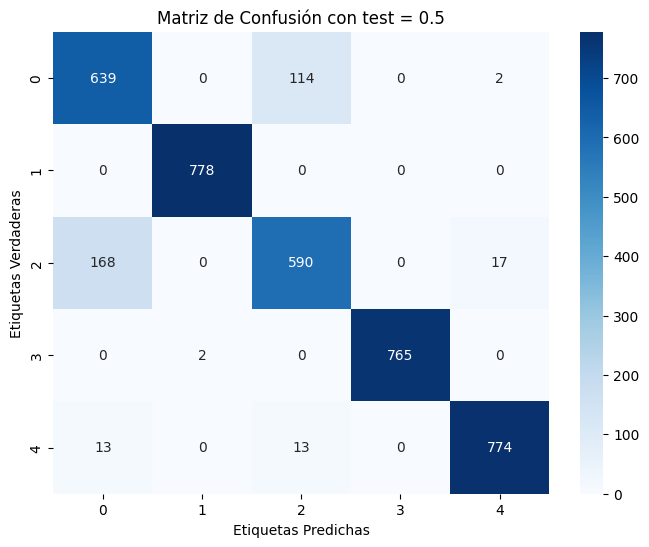

Exactitud del modelo: 0.9150967741935484
Precisión del modelo: 0.9161062220451687
Recall del modelo: 0.9150967741935484
Puntuación F1 del modelo: 0.9150878287542076
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.6.png


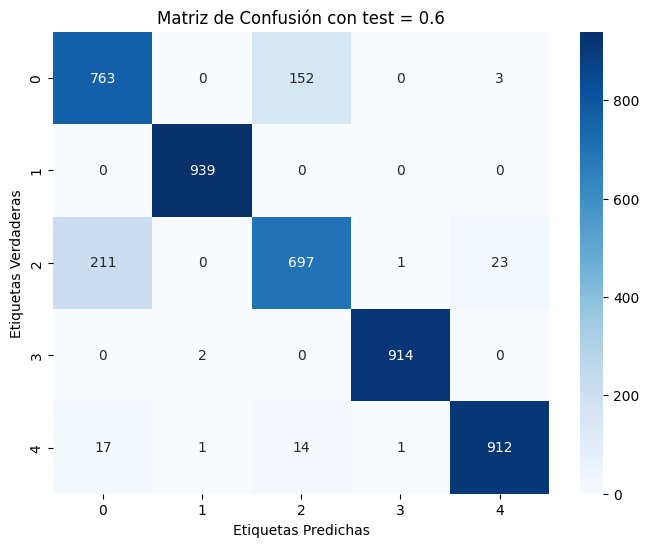

Exactitud del modelo: 0.9086021505376344
Precisión del modelo: 0.9093200805994478
Recall del modelo: 0.9086021505376344
Puntuación F1 del modelo: 0.9084964362423371
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.7.png


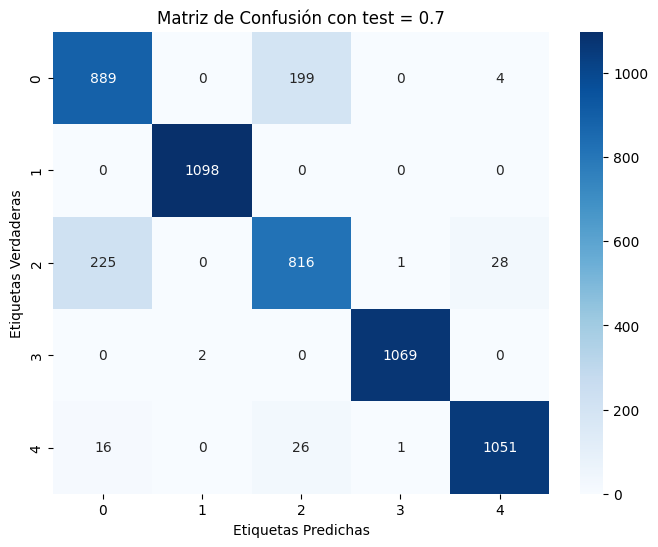

Exactitud del modelo: 0.9074654377880185
Precisión del modelo: 0.9077447053513353
Recall del modelo: 0.9074654377880185
Puntuación F1 del modelo: 0.9075240298228885
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.8.png


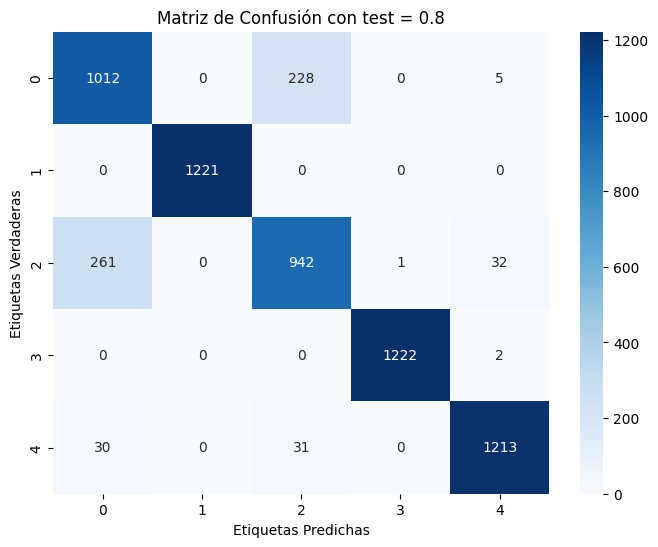

Exactitud del modelo: 0.9048387096774193
Precisión del modelo: 0.9055998688729946
Recall del modelo: 0.9048387096774193
Puntuación F1 del modelo: 0.9050897964781657
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.9.png


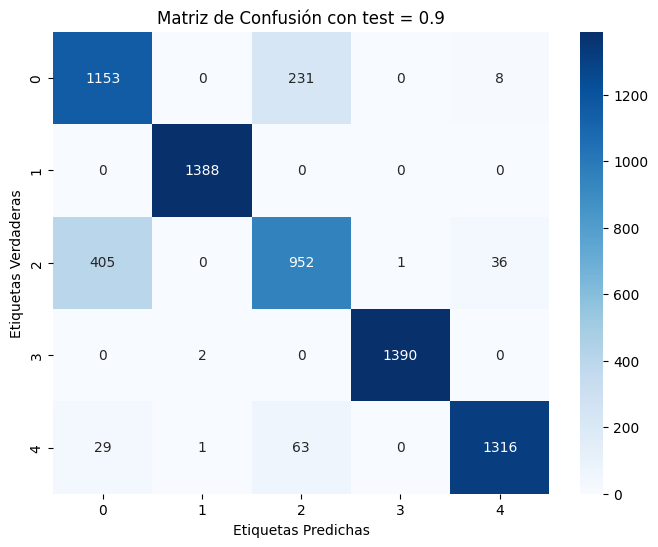

Exactitud del modelo: 0.8887455197132617
Precisión del modelo: 0.8911578696719628
Recall del modelo: 0.8887455197132617
Puntuación F1 del modelo: 0.8887720851067398
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_3_vecinos/KNN_llama3_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_cruz_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_2.png


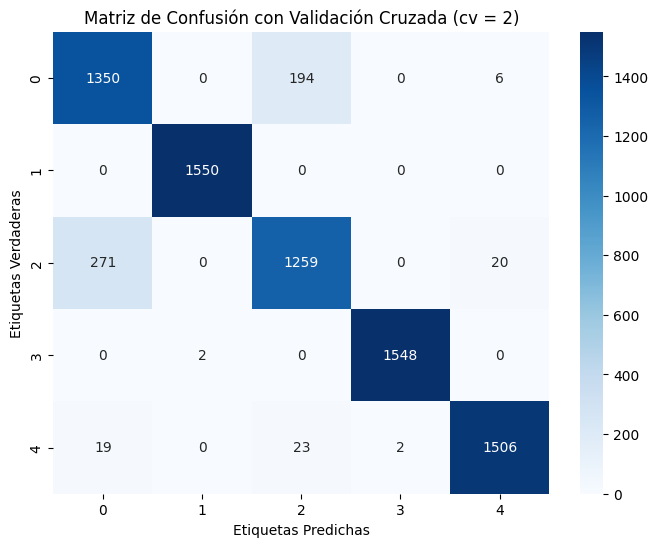

Exactitud media: 0.9307096774193548
Precisión media: 0.9313202999539574
Recall media: 0.9307096774193548
Puntuación F1 media: 0.9307738009549898
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_3.png


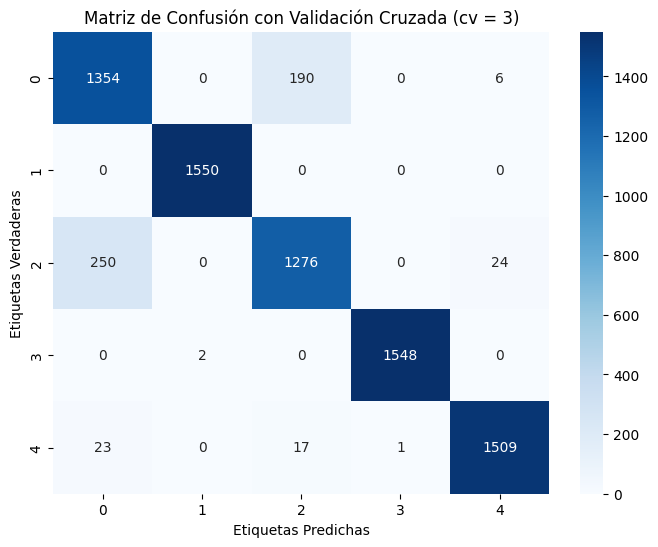

Exactitud media: 0.9338064516129032
Precisión media: 0.9342394343122548
Recall media: 0.9338064516129032
Puntuación F1 media: 0.93383800312021
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_4.png


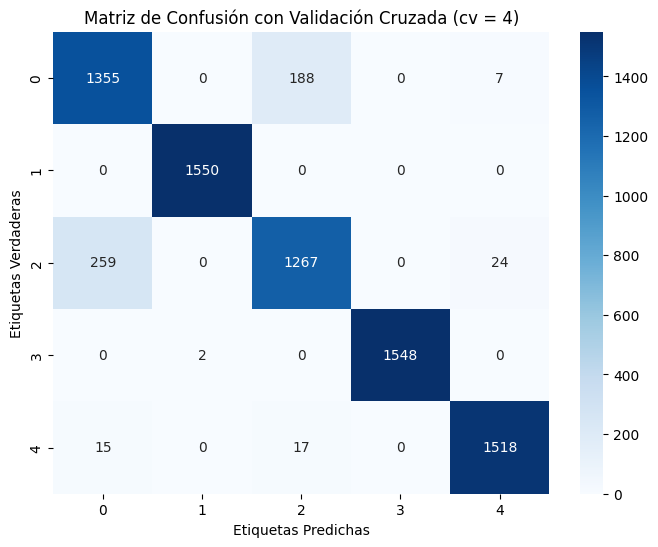

Exactitud media: 0.9339354838709677
Precisión media: 0.934246154756145
Recall media: 0.9339354838709677
Puntuación F1 media: 0.9338734812965553
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_5.png


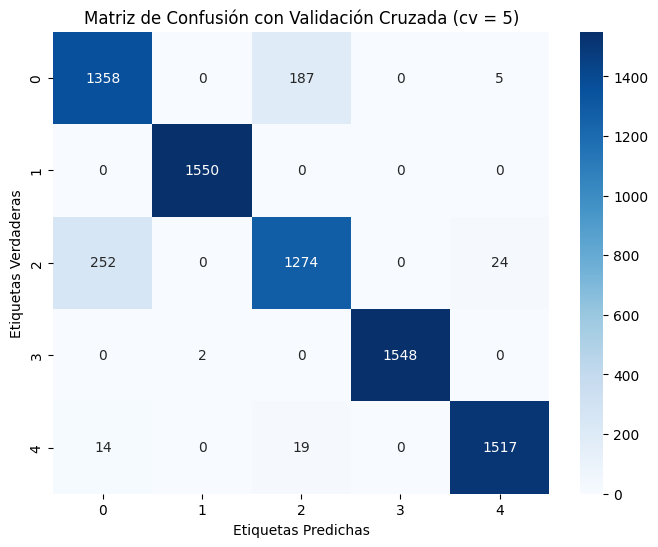

Exactitud media: 0.9350967741935484
Precisión media: 0.935394192437418
Recall media: 0.9350967741935484
Puntuación F1 media: 0.9350621025978204
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_6.png


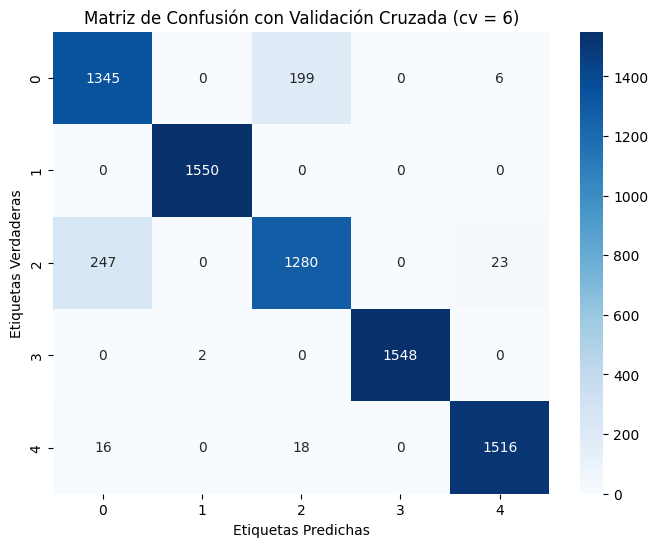

Exactitud media: 0.9340645161290323
Precisión media: 0.9342854639824603
Recall media: 0.9340645161290323
Puntuación F1 media: 0.9340659728856194
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_7.png


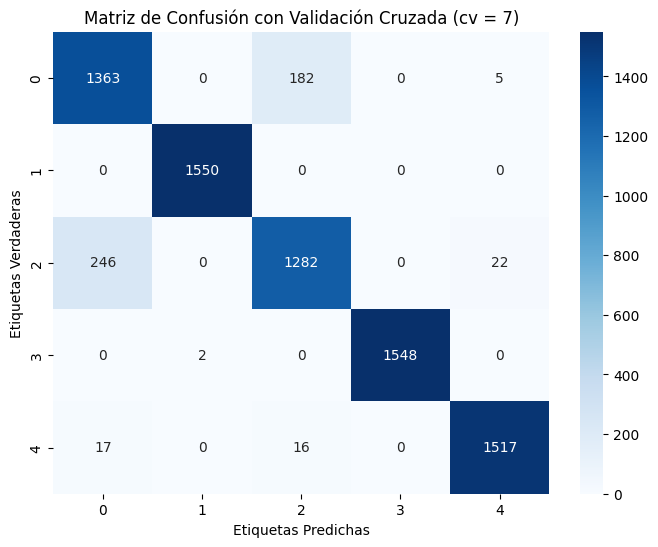

Exactitud media: 0.9367741935483871
Precisión media: 0.9371387784648205
Recall media: 0.9367741935483871
Puntuación F1 media: 0.9367668535160093
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_8.png


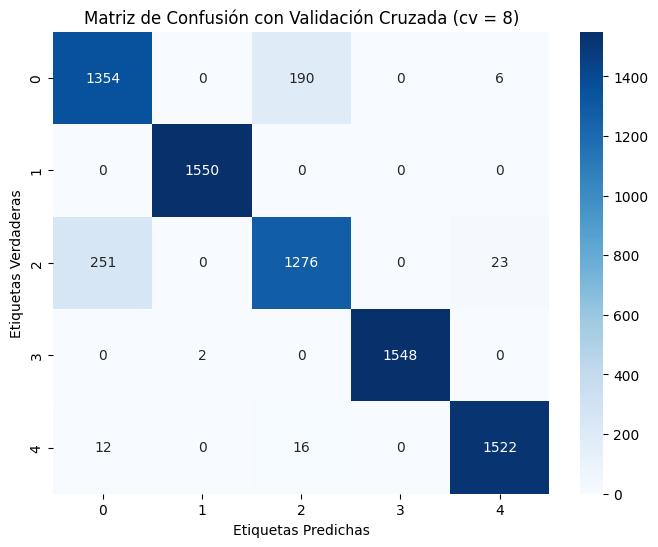

Exactitud media: 0.9354838709677419
Precisión media: 0.9356730998607268
Recall media: 0.9354838709677419
Puntuación F1 media: 0.9354170102922511
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_9.png


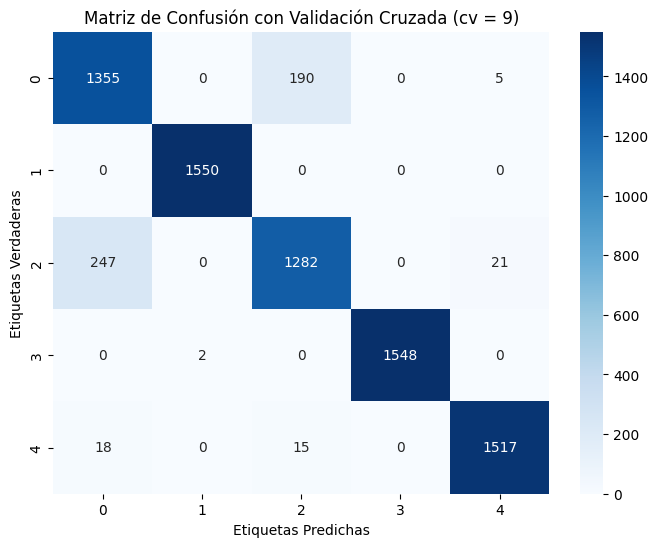

Exactitud media: 0.935741935483871
Precisión media: 0.9360838671227877
Recall media: 0.935741935483871
Puntuación F1 media: 0.9357556267232205
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_10.png


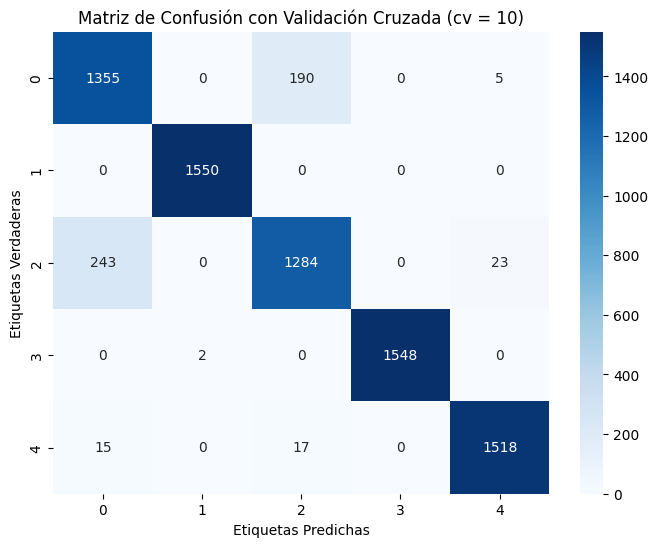

Exactitud media: 0.9361290322580645
Precisión media: 0.9363633368782415
Recall media: 0.9361290322580645
Puntuación F1 media: 0.93611408559138
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_3_vecinos/KNN_llama3_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_simple_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.1.png


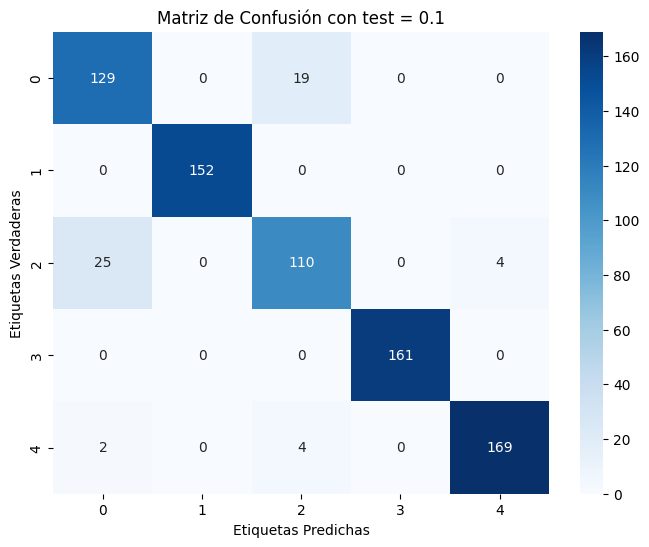

Exactitud del modelo: 0.9303225806451613
Precisión del modelo: 0.9307106820968857
Recall del modelo: 0.9303225806451613
Puntuación F1 del modelo: 0.9303264491792853
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.2.png


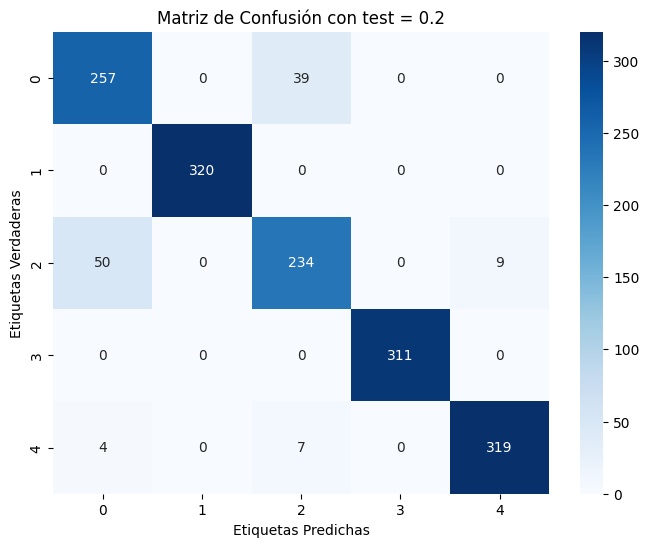

Exactitud del modelo: 0.9296774193548387
Precisión del modelo: 0.9299444575956273
Recall del modelo: 0.9296774193548387
Puntuación F1 del modelo: 0.9296307092201486
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.3.png


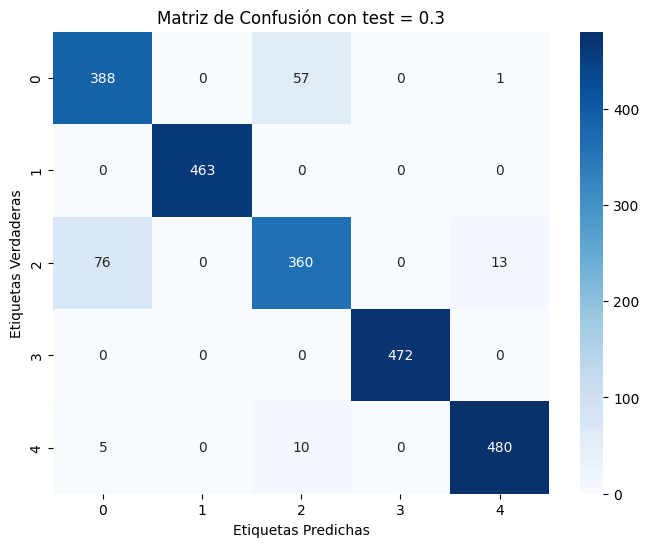

Exactitud del modelo: 0.9303225806451613
Precisión del modelo: 0.9305341723598293
Recall del modelo: 0.9303225806451613
Puntuación F1 del modelo: 0.9302251308180284
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.4.png


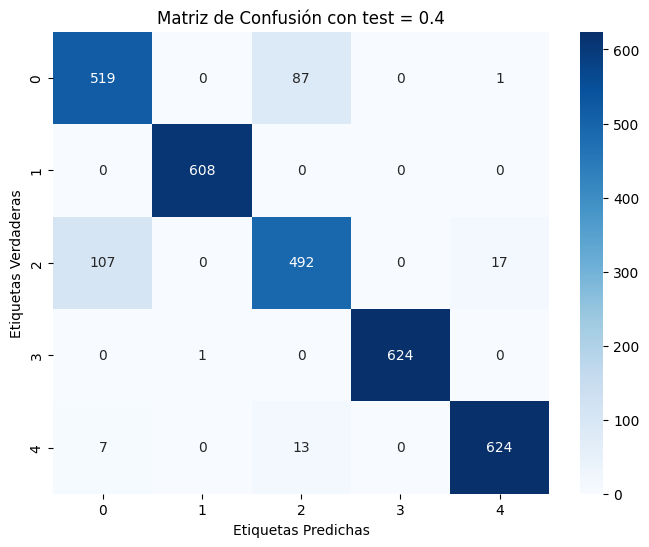

Exactitud del modelo: 0.9248387096774193
Precisión del modelo: 0.9250238637647394
Recall del modelo: 0.9248387096774193
Puntuación F1 del modelo: 0.9247945283579172
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.5.png


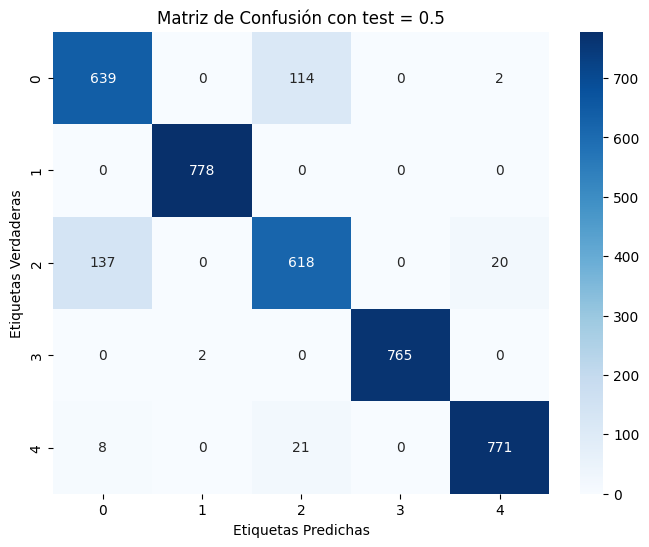

Exactitud del modelo: 0.9215483870967742
Precisión del modelo: 0.9218658648418948
Recall del modelo: 0.9215483870967742
Puntuación F1 del modelo: 0.9216115859535405
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.6.png


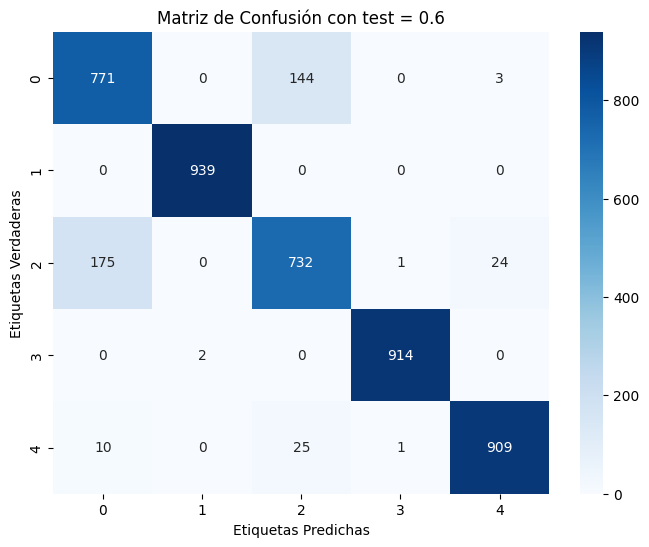

Exactitud del modelo: 0.9172043010752688
Precisión del modelo: 0.917480331507378
Recall del modelo: 0.9172043010752688
Puntuación F1 del modelo: 0.9172249706294839
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.7.png


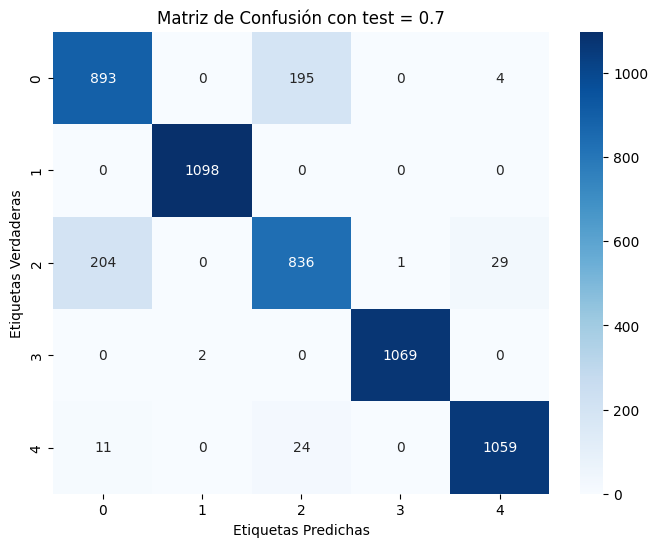

Exactitud del modelo: 0.9133640552995391
Precisión del modelo: 0.9133517440163543
Recall del modelo: 0.9133640552995391
Puntuación F1 del modelo: 0.9133411489920972
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.8.png


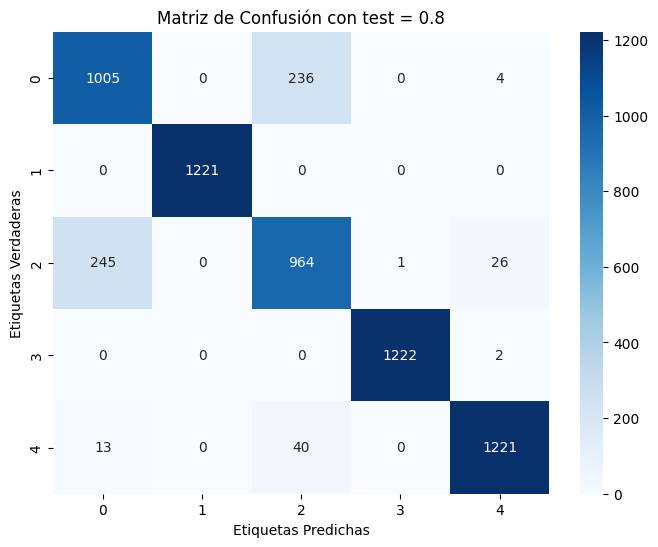

Exactitud del modelo: 0.9085483870967742
Precisión del modelo: 0.9091984115628948
Recall del modelo: 0.9085483870967742
Puntuación F1 del modelo: 0.908850956803744
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.9.png


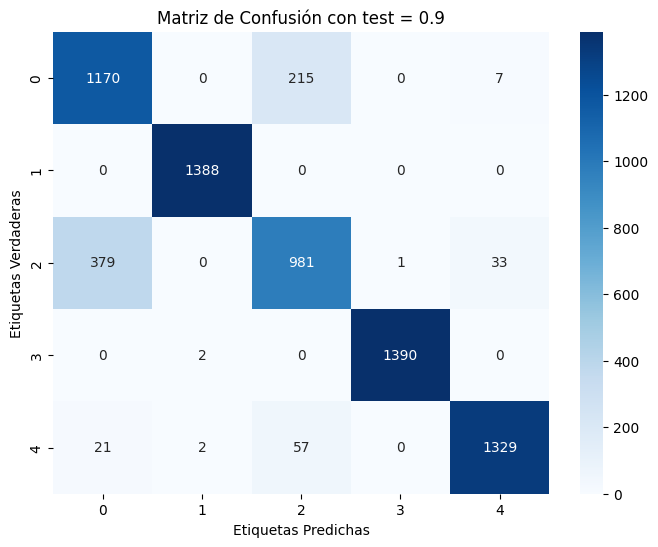

Exactitud del modelo: 0.8972043010752688
Precisión del modelo: 0.8991518590752959
Recall del modelo: 0.8972043010752688
Puntuación F1 del modelo: 0.897144597579848
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_5_vecinos/KNN_llama3_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_cruz_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_2.png


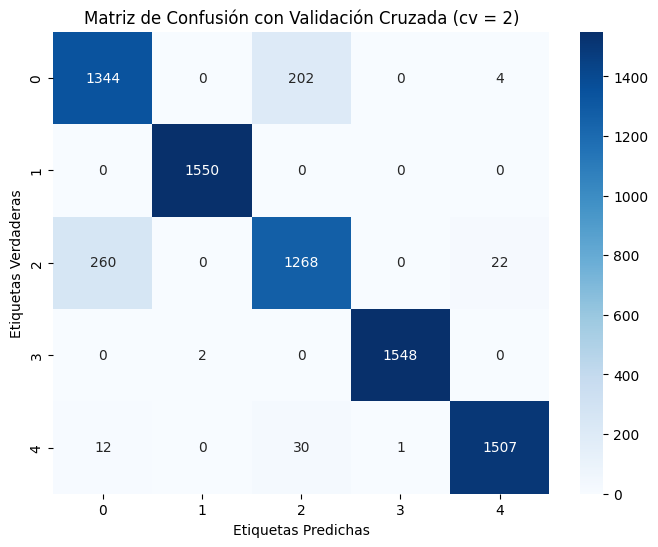

Exactitud media: 0.9312258064516129
Precisión media: 0.9316244110646392
Recall media: 0.9312258064516129
Puntuación F1 media: 0.9313005317738663
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_3.png


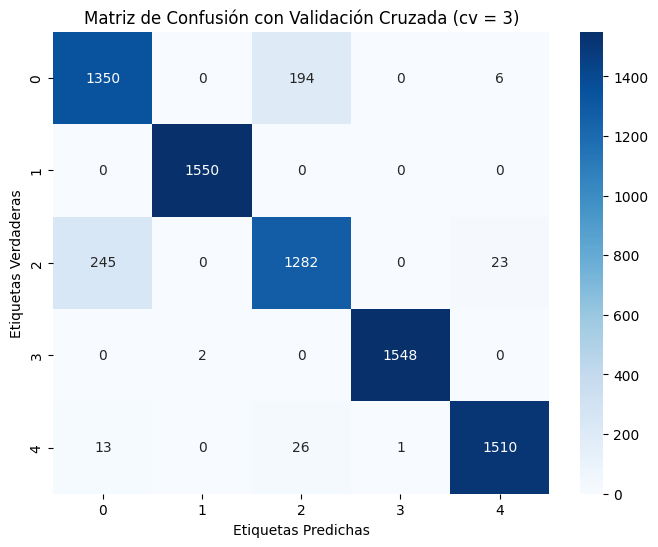

Exactitud media: 0.9341935483870968
Precisión media: 0.9344606449814109
Recall media: 0.9341935483870968
Puntuación F1 media: 0.9342252449394057
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_4.png


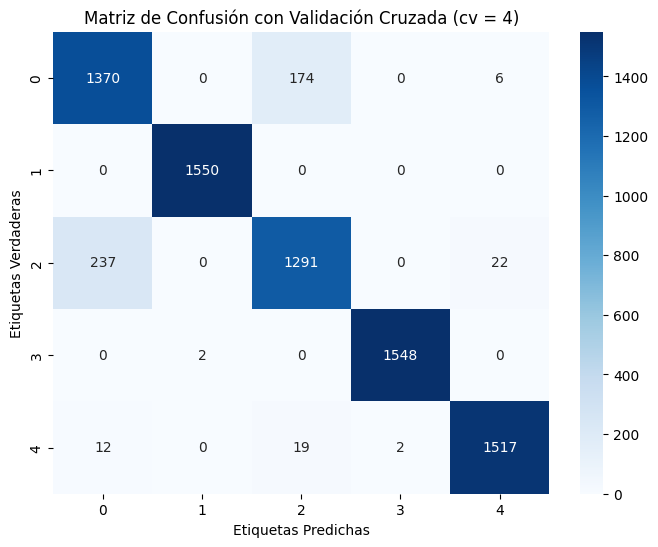

Exactitud media: 0.9388387096774193
Precisión media: 0.9390890981573926
Recall media: 0.9388387096774193
Puntuación F1 media: 0.9388007084317246
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_5.png


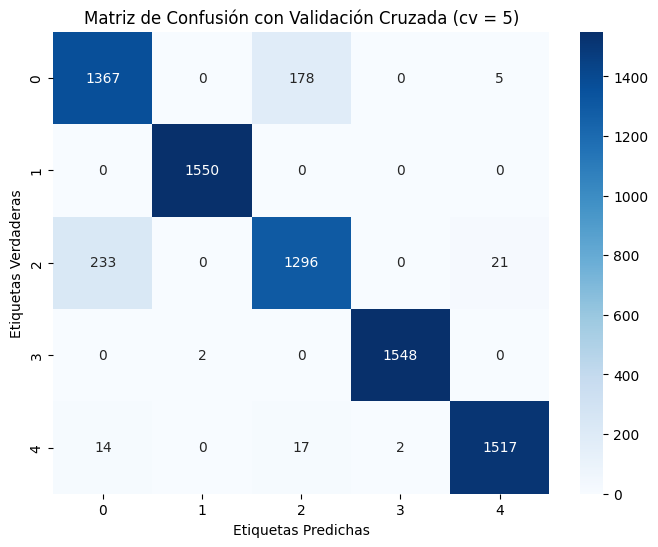

Exactitud media: 0.9390967741935484
Precisión media: 0.9393500164345129
Recall media: 0.9390967741935484
Puntuación F1 media: 0.9390873763747201
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_6.png


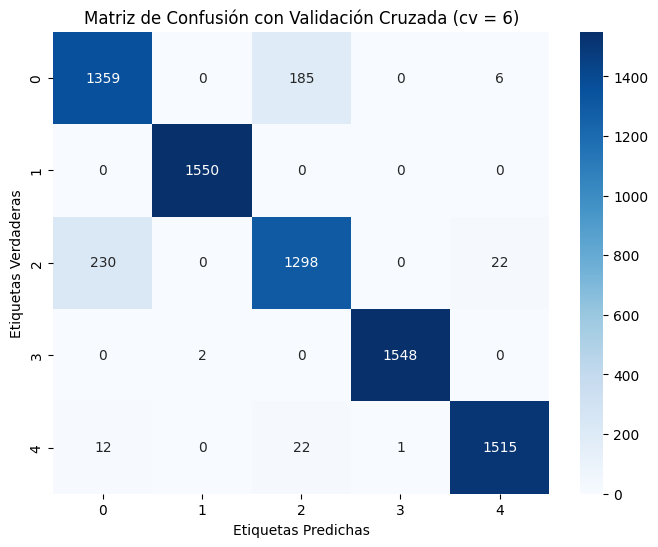

Exactitud media: 0.9380645161290323
Precisión media: 0.9382444476920186
Recall media: 0.9380645161290323
Puntuación F1 media: 0.9380712867937189
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_7.png


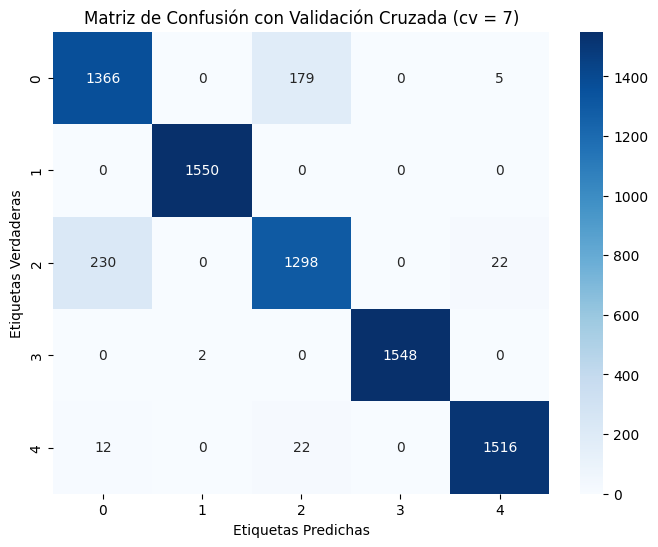

Exactitud media: 0.9390967741935484
Precisión media: 0.9393252110120212
Recall media: 0.9390967741935484
Puntuación F1 media: 0.9391037835760442
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_8.png


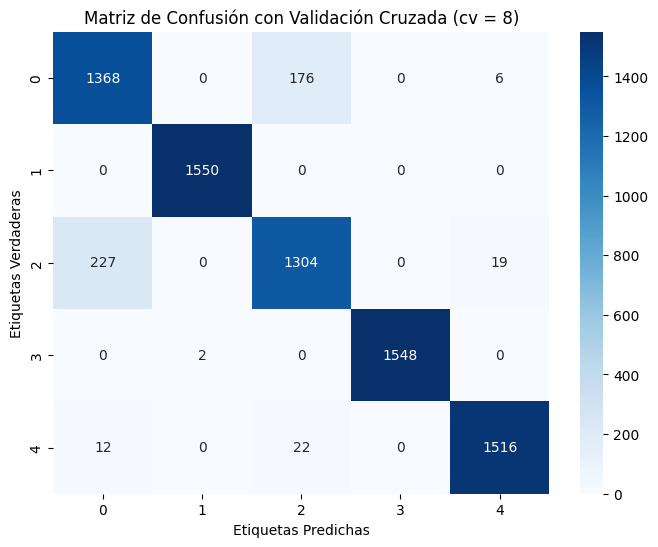

Exactitud media: 0.9401290322580645
Precisión media: 0.9403879086265188
Recall media: 0.9401290322580645
Puntuación F1 media: 0.9401578355453083
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_9.png


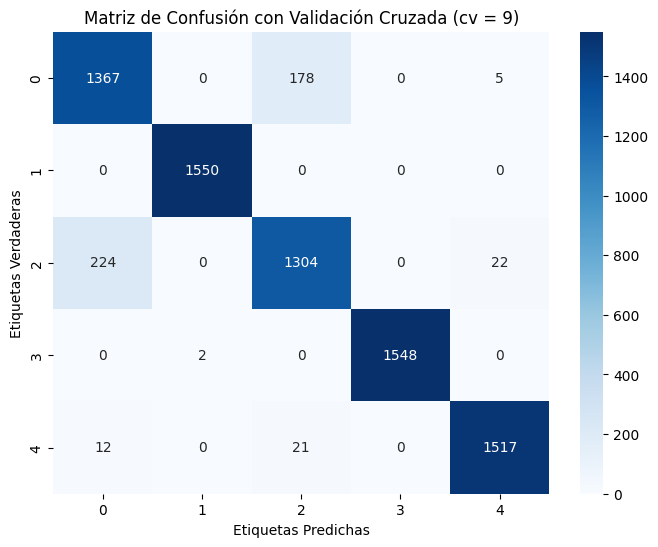

Exactitud media: 0.9401290322580645
Precisión media: 0.9403196951098117
Recall media: 0.9401290322580645
Puntuación F1 media: 0.9401339444457211
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_10.png


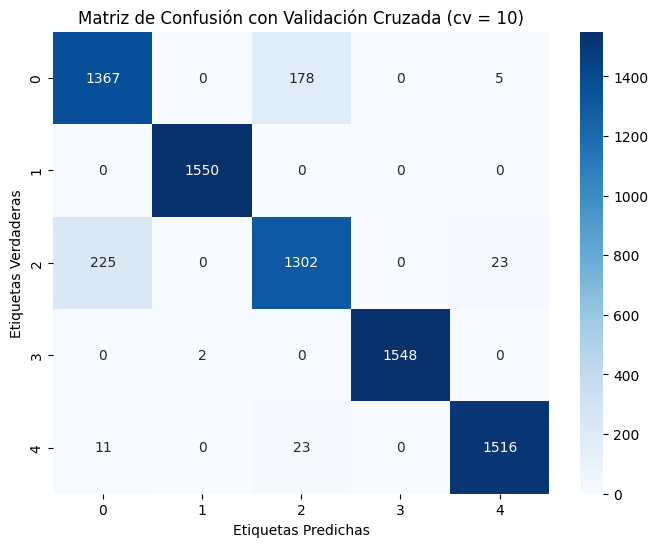

Exactitud media: 0.939741935483871
Precisión media: 0.9399240270331845
Recall media: 0.939741935483871
Puntuación F1 media: 0.9397426246231764
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_5_vecinos/KNN_llama3_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_simple_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.1.png


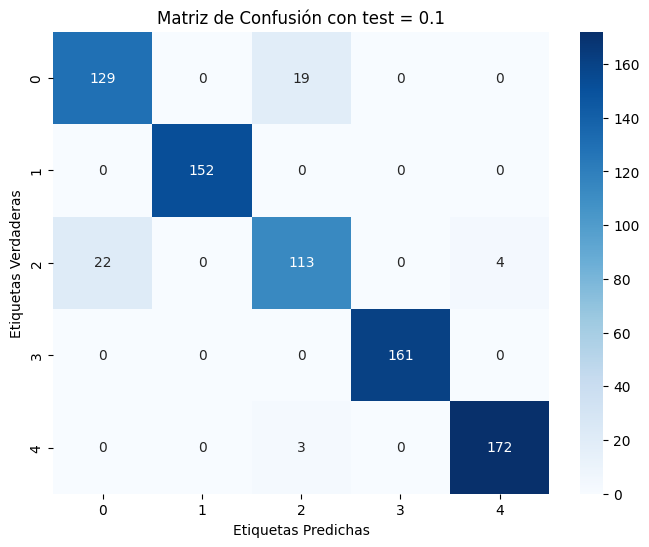

Exactitud del modelo: 0.9380645161290323
Precisión del modelo: 0.9378167245336653
Recall del modelo: 0.9380645161290323
Puntuación F1 del modelo: 0.9378906995679961
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.2.png


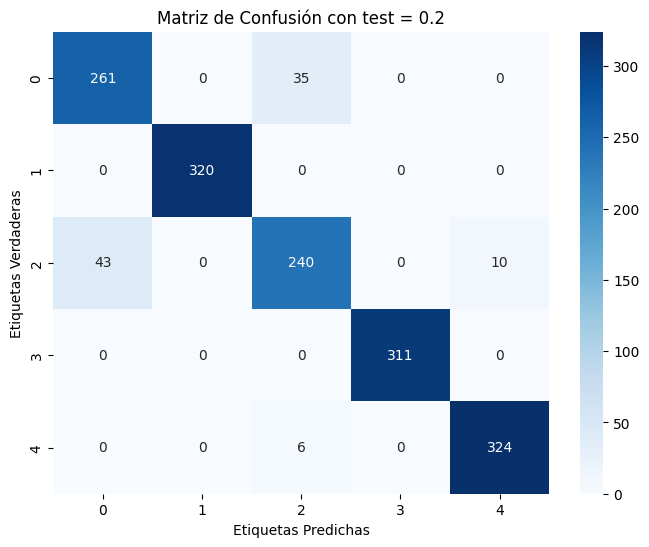

Exactitud del modelo: 0.9393548387096774
Precisión del modelo: 0.9390325482236741
Recall del modelo: 0.9393548387096774
Puntuación F1 del modelo: 0.9390874931444334
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.3.png


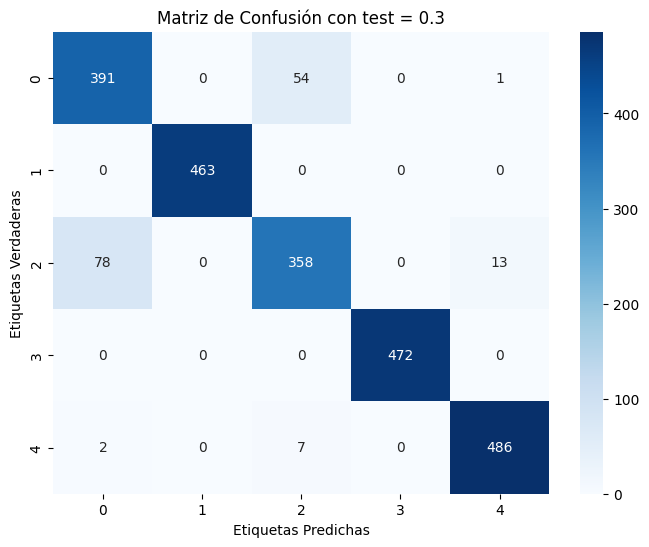

Exactitud del modelo: 0.9333333333333333
Precisión del modelo: 0.9333413947247106
Recall del modelo: 0.9333333333333333
Puntuación F1 del modelo: 0.933019914299735
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.4.png


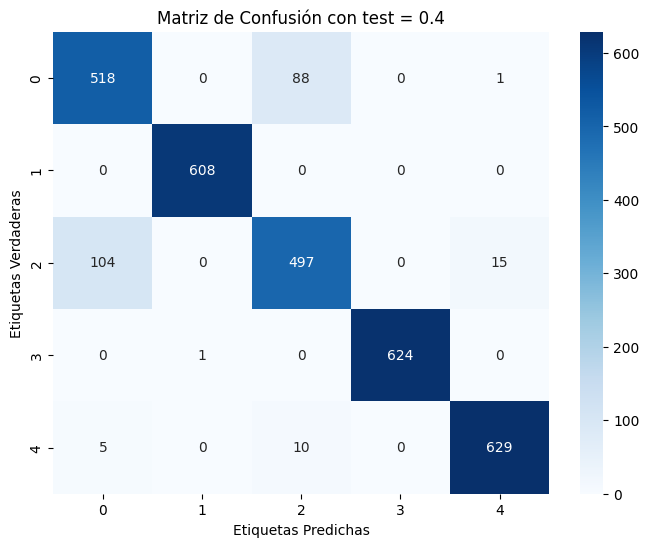

Exactitud del modelo: 0.927741935483871
Precisión del modelo: 0.9277562899069203
Recall del modelo: 0.927741935483871
Puntuación F1 del modelo: 0.9276564743706065
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.5.png


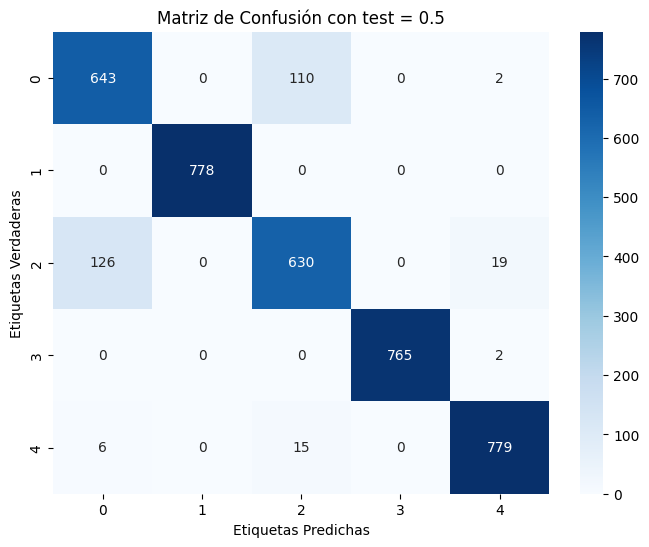

Exactitud del modelo: 0.927741935483871
Precisión del modelo: 0.9277813032111578
Recall del modelo: 0.927741935483871
Puntuación F1 del modelo: 0.9277048323985454
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.6.png


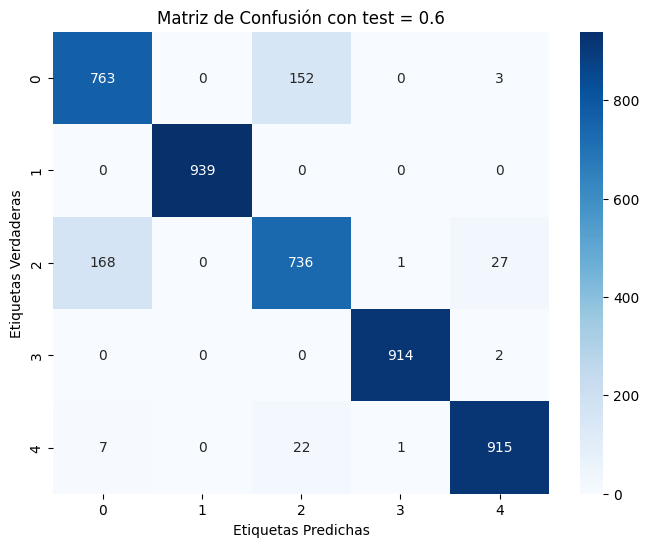

Exactitud del modelo: 0.9176344086021505
Precisión del modelo: 0.9175467380030903
Recall del modelo: 0.9176344086021505
Puntuación F1 del modelo: 0.9175486520356344
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.7.png


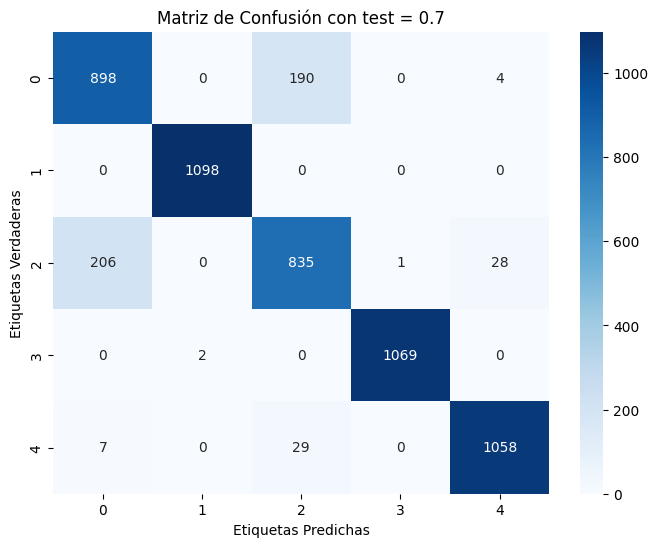

Exactitud del modelo: 0.9139170506912443
Precisión del modelo: 0.9139545542266535
Recall del modelo: 0.9139170506912443
Puntuación F1 del modelo: 0.9139139288025354
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.8.png


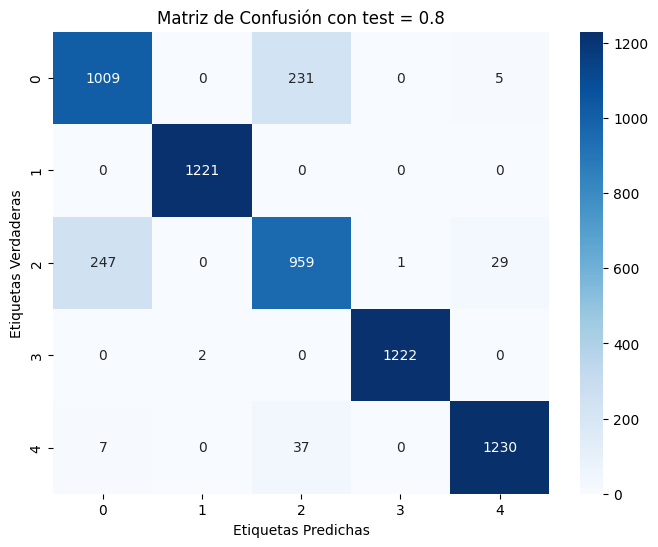

Exactitud del modelo: 0.9098387096774193
Precisión del modelo: 0.9100625238654201
Recall del modelo: 0.9098387096774193
Puntuación F1 del modelo: 0.9099369640858114
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.9.png


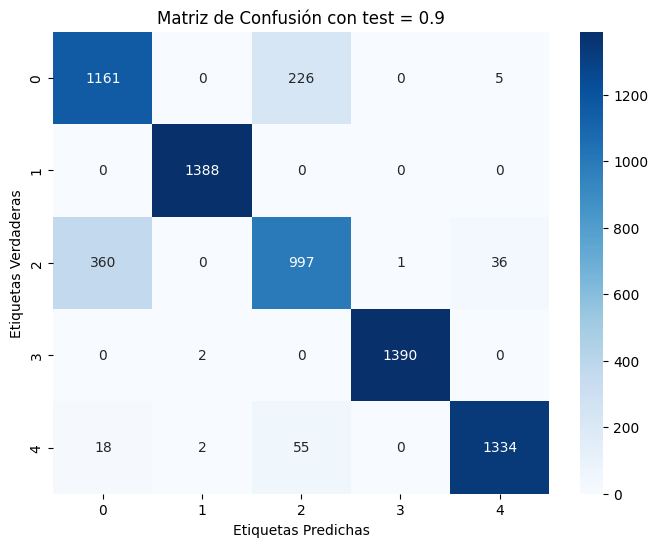

Exactitud del modelo: 0.8989247311827957
Precisión del modelo: 0.9003006083173326
Recall del modelo: 0.8989247311827957
Puntuación F1 del modelo: 0.8989030379592007
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_7_vecinos/KNN_llama3_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_cruz_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_2.png


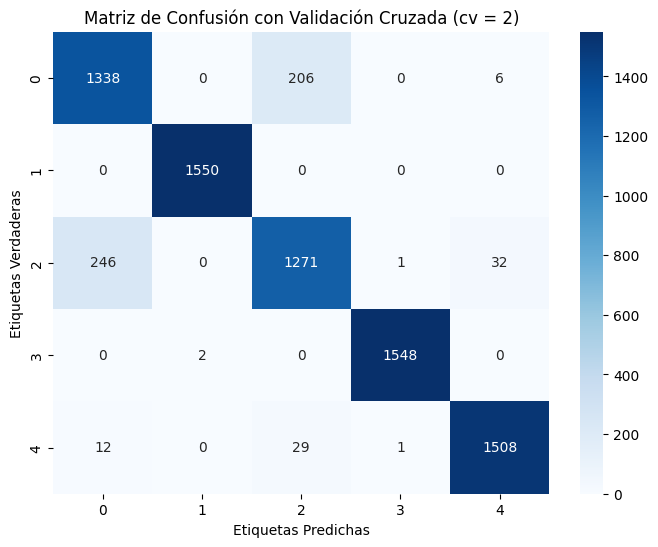

Exactitud media: 0.9309677419354838
Precisión media: 0.9310289650904017
Recall media: 0.9309677419354838
Puntuación F1 media: 0.9309270726095301
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_3.png


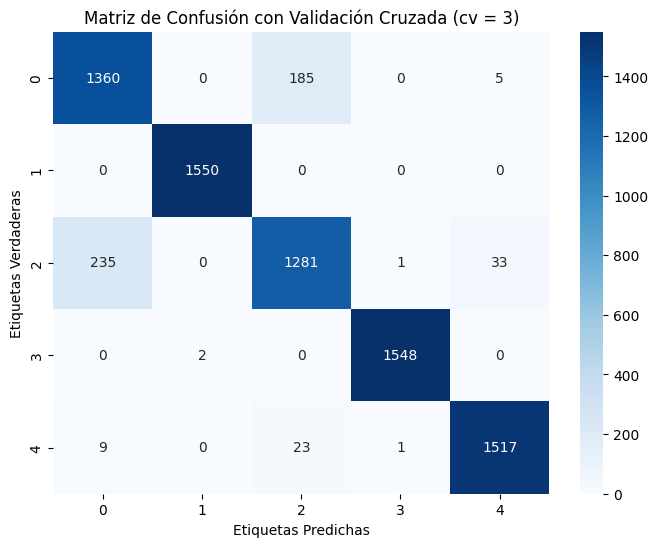

Exactitud media: 0.936258064516129
Precisión media: 0.9362345900022564
Recall media: 0.936258064516129
Puntuación F1 media: 0.9361272035148798
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_4.png


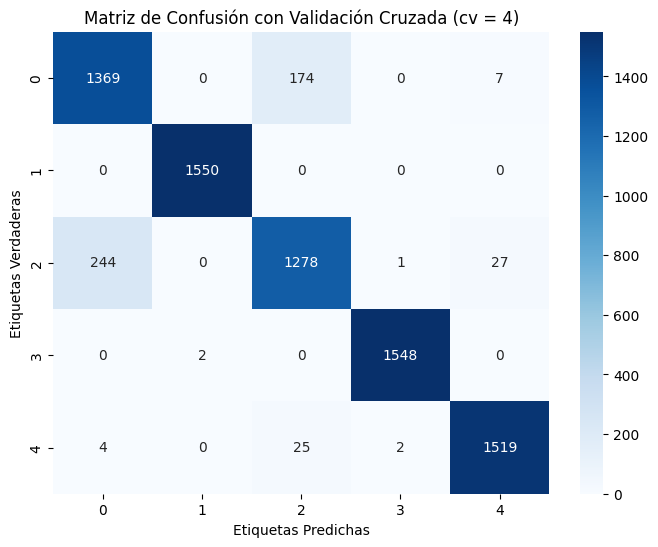

Exactitud media: 0.9372903225806452
Precisión media: 0.9373561978046038
Recall media: 0.9372903225806452
Puntuación F1 media: 0.9371472744981002
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_5.png


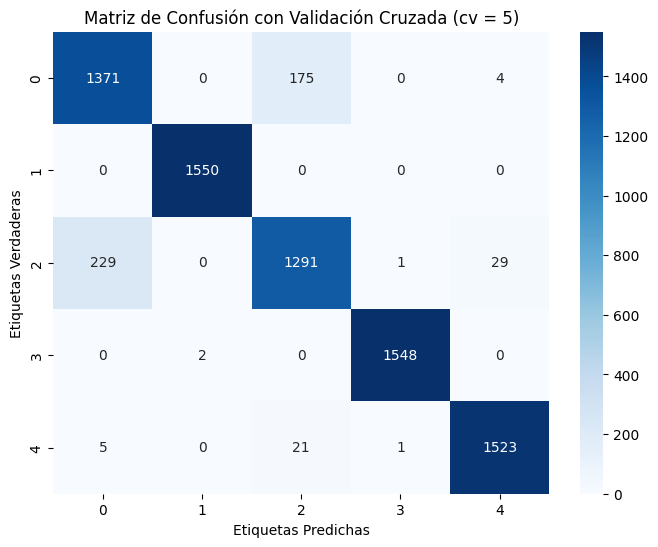

Exactitud media: 0.939741935483871
Precisión media: 0.9397218774897363
Recall media: 0.939741935483871
Puntuación F1 media: 0.9396050507431934
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_6.png


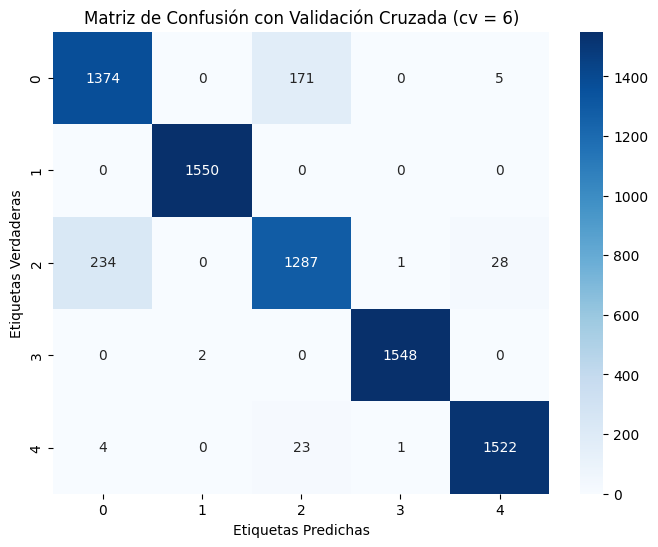

Exactitud media: 0.9394838709677419
Precisión media: 0.9395127800373875
Recall media: 0.9394838709677419
Puntuación F1 media: 0.9393428172914371
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_7.png


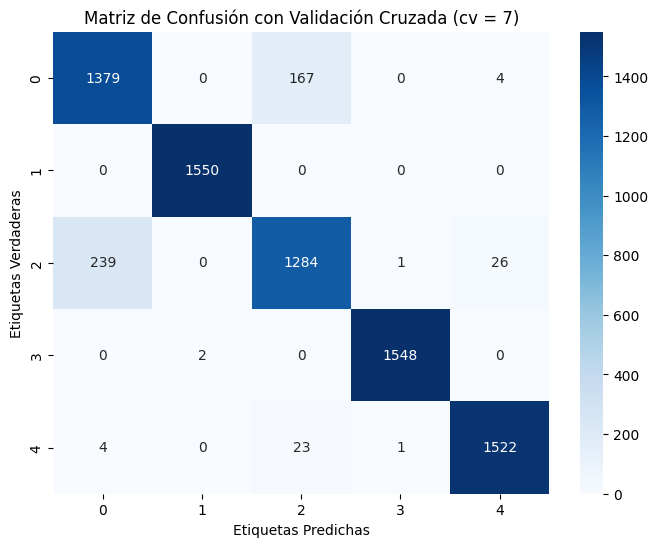

Exactitud media: 0.939741935483871
Precisión media: 0.9398750255530509
Recall media: 0.939741935483871
Puntuación F1 media: 0.939611328579633
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_8.png


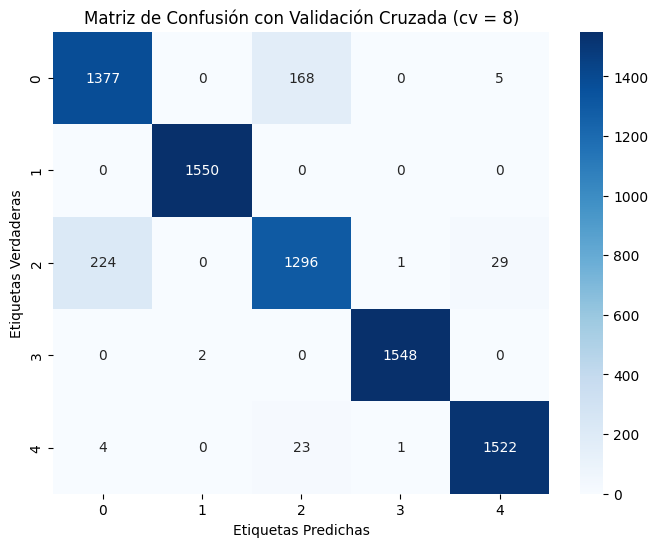

Exactitud media: 0.9410322580645162
Precisión media: 0.9410135012930558
Recall media: 0.9410322580645162
Puntuación F1 media: 0.940895509664811
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_9.png


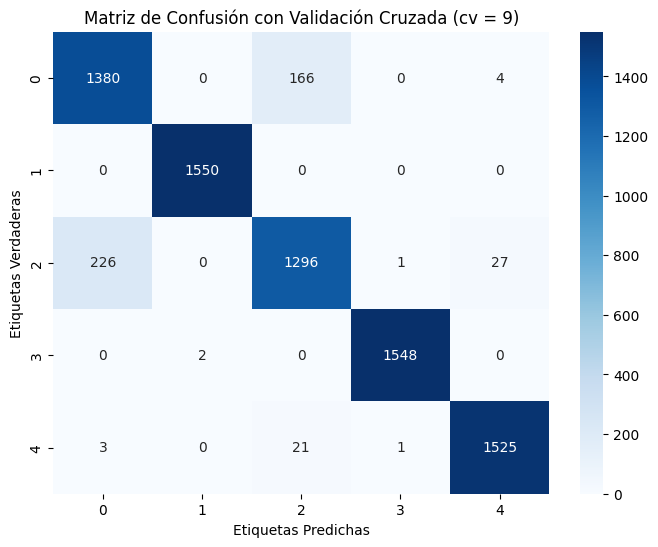

Exactitud media: 0.9418064516129032
Precisión media: 0.94181559229701
Recall media: 0.9418064516129032
Puntuación F1 media: 0.941665785111868
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_10.png


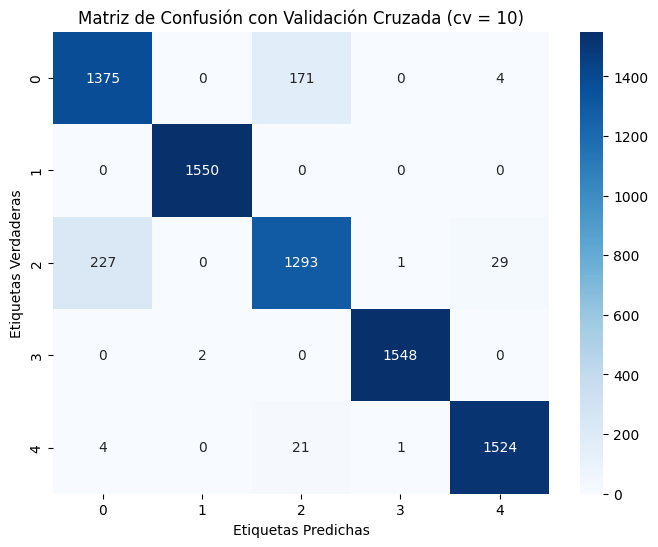

Exactitud media: 0.9406451612903226
Precisión media: 0.9406195733769243
Recall media: 0.9406451612903226
Puntuación F1 media: 0.9404982016731555
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_7_vecinos/KNN_llama3_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_simple_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.1.png


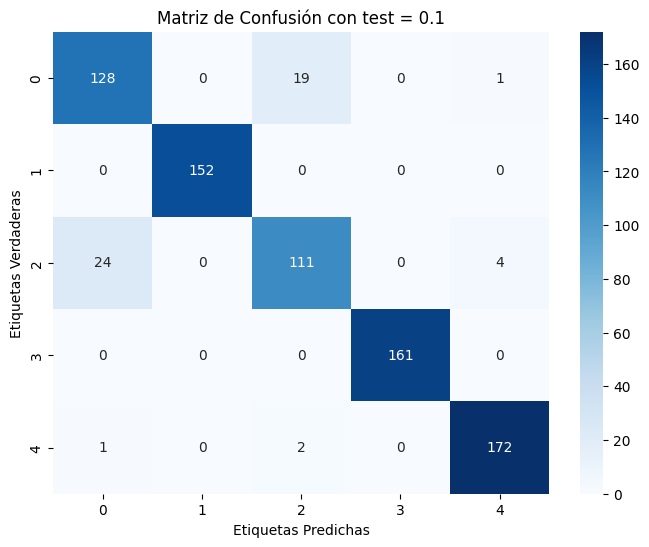

Exactitud del modelo: 0.9341935483870968
Precisión del modelo: 0.9338836829362029
Recall del modelo: 0.9341935483870968
Puntuación F1 del modelo: 0.9338885678672747
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.2.png


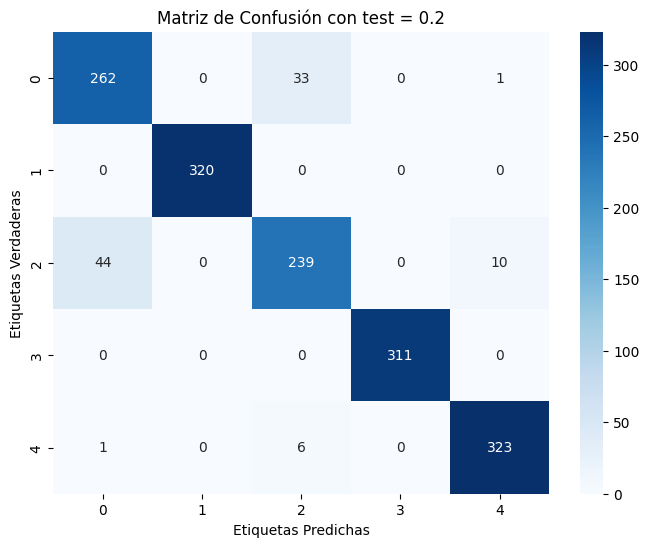

Exactitud del modelo: 0.9387096774193548
Precisión del modelo: 0.938477288922804
Recall del modelo: 0.9387096774193548
Puntuación F1 del modelo: 0.9384214448767952
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.3.png


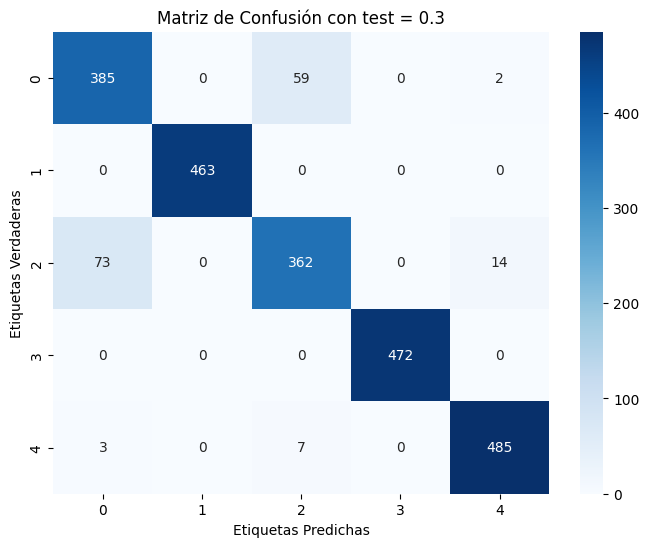

Exactitud del modelo: 0.9320430107526881
Precisión del modelo: 0.9317962081901058
Recall del modelo: 0.9320430107526881
Puntuación F1 del modelo: 0.931776067020197
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.4.png


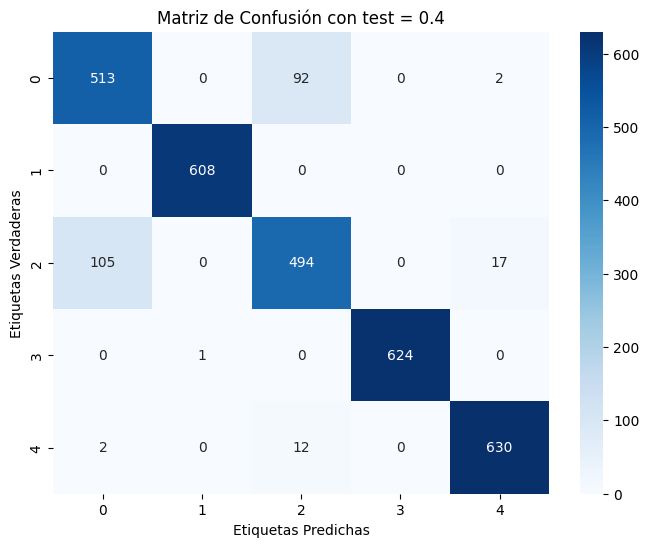

Exactitud del modelo: 0.925483870967742
Precisión del modelo: 0.9252455273178378
Recall del modelo: 0.925483870967742
Puntuación F1 del modelo: 0.925307469277019
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.5.png


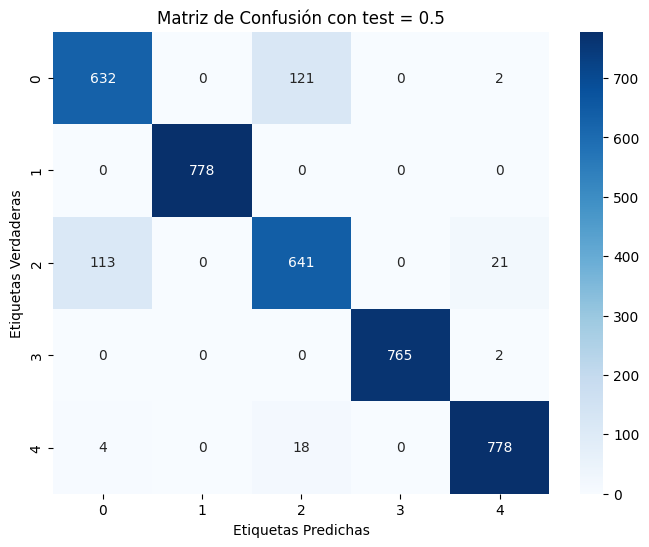

Exactitud del modelo: 0.927483870967742
Precisión del modelo: 0.9274960453485774
Recall del modelo: 0.927483870967742
Puntuación F1 del modelo: 0.9274846084909825
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.6.png


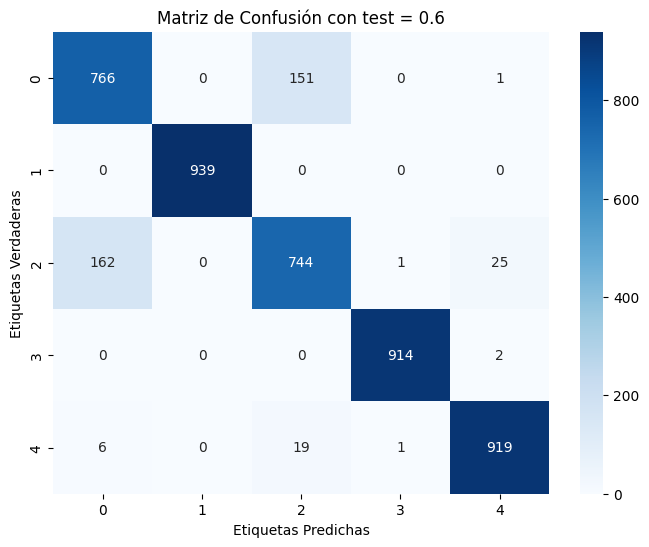

Exactitud del modelo: 0.9208602150537635
Precisión del modelo: 0.9207718617651198
Recall del modelo: 0.9208602150537635
Puntuación F1 del modelo: 0.9207882656329981
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.7.png


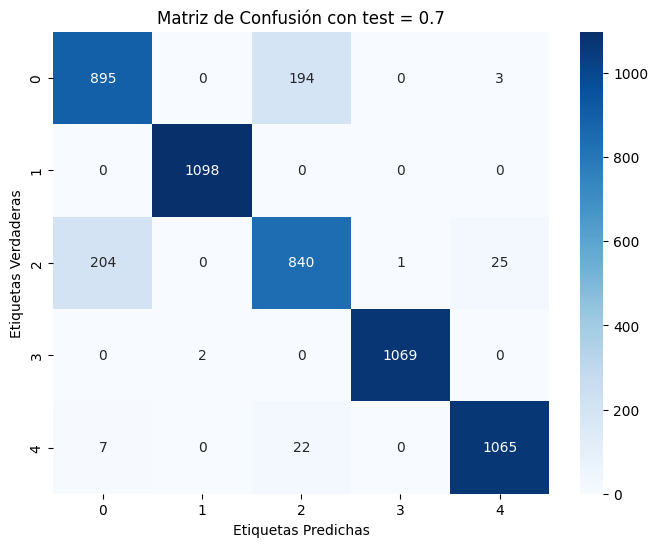

Exactitud del modelo: 0.9155760368663595
Precisión del modelo: 0.9155362827521067
Recall del modelo: 0.9155760368663595
Puntuación F1 del modelo: 0.9155424986911602
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.8.png


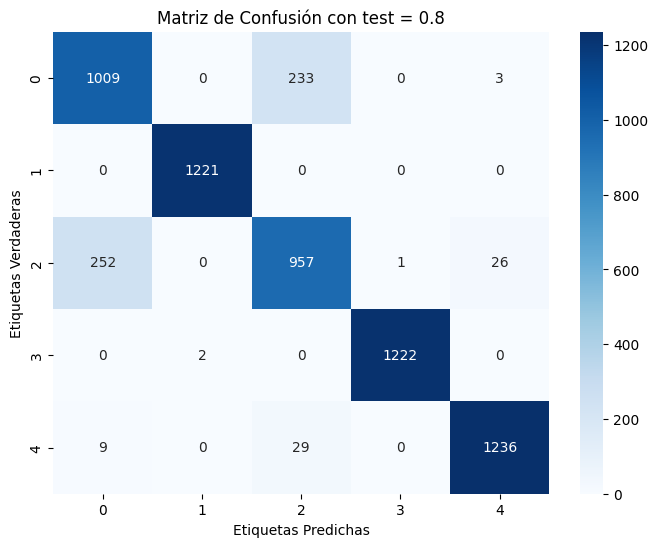

Exactitud del modelo: 0.910483870967742
Precisión del modelo: 0.9106903402495565
Recall del modelo: 0.910483870967742
Puntuación F1 del modelo: 0.9105610517150852
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.9.png


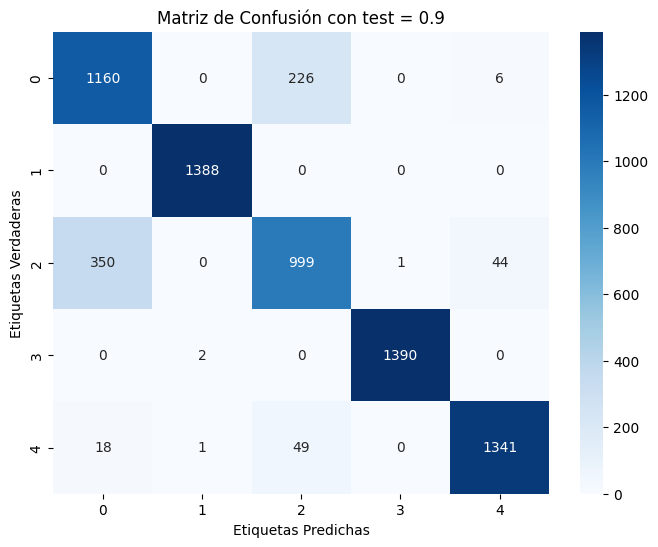

Exactitud del modelo: 0.9000716845878136
Precisión del modelo: 0.9009620061168429
Recall del modelo: 0.9000716845878136
Puntuación F1 del modelo: 0.899860491908155
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_9_vecinos/KNN_llama3_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_cruz_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_2.png


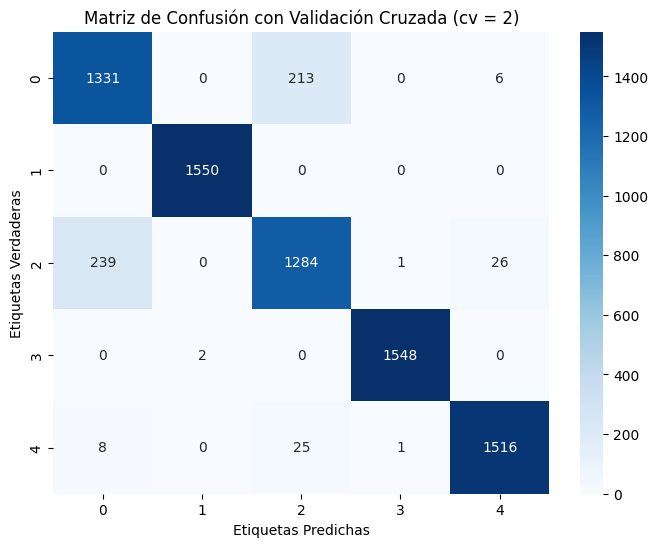

Exactitud media: 0.9327741935483871
Precisión media: 0.9327697480300378
Recall media: 0.9327741935483871
Puntuación F1 media: 0.9327442765712962
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_3.png


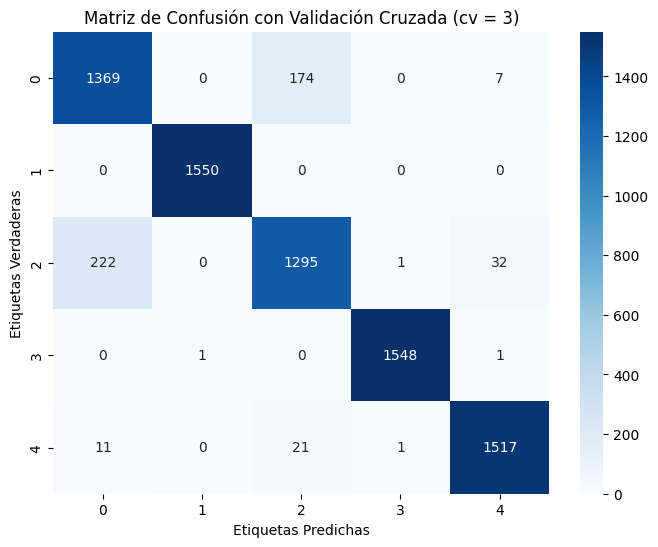

Exactitud media: 0.9392258064516129
Precisión media: 0.939211764510516
Recall media: 0.9392258064516129
Puntuación F1 media: 0.9391040748451395
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_4.png


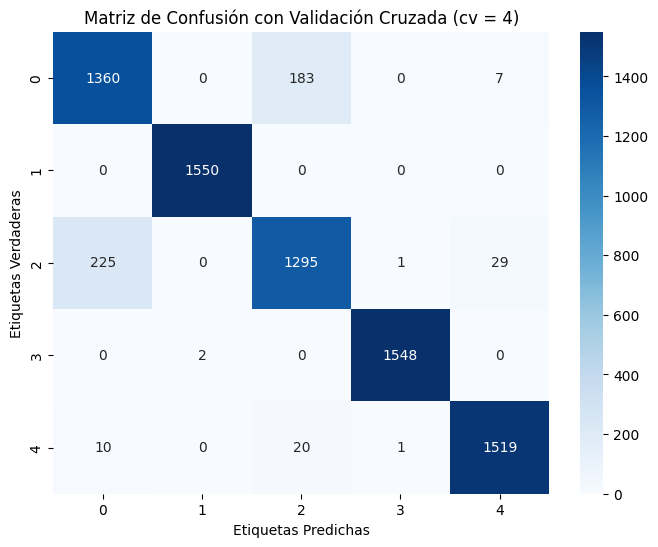

Exactitud media: 0.9383225806451613
Precisión media: 0.938284090066906
Recall media: 0.9383225806451613
Puntuación F1 media: 0.9382178459856105
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_5.png


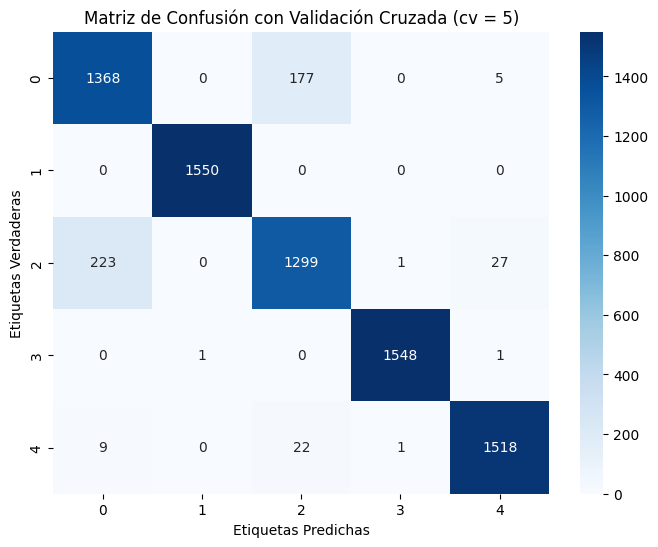

Exactitud media: 0.939741935483871
Precisión media: 0.9397889089253562
Recall media: 0.939741935483871
Puntuación F1 media: 0.9396719707531644
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_6.png


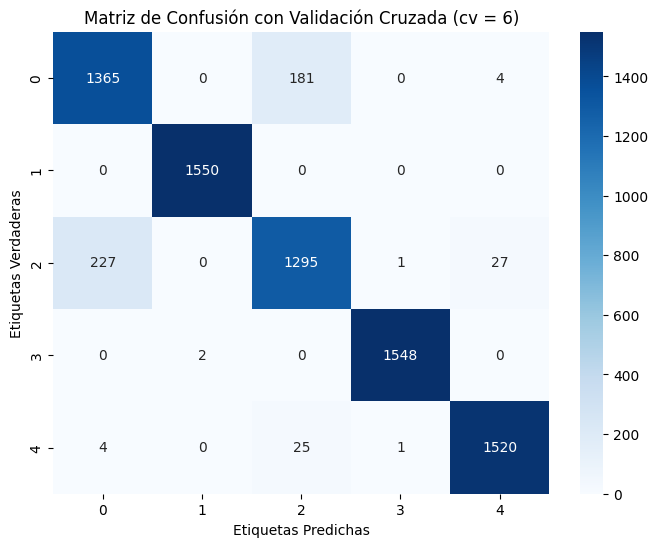

Exactitud media: 0.9390967741935484
Precisión media: 0.9390910463305278
Recall media: 0.9390967741935484
Puntuación F1 media: 0.9390128905264823
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_7.png


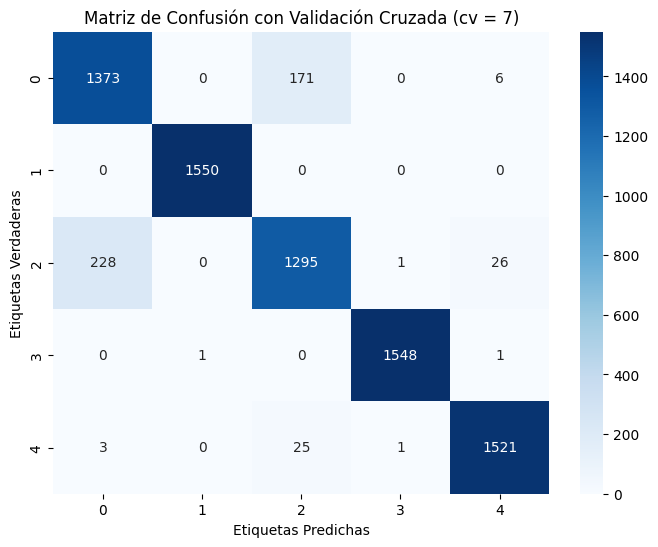

Exactitud media: 0.940258064516129
Precisión media: 0.9402718098407375
Recall media: 0.940258064516129
Puntuación F1 media: 0.9401493904851375
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_8.png


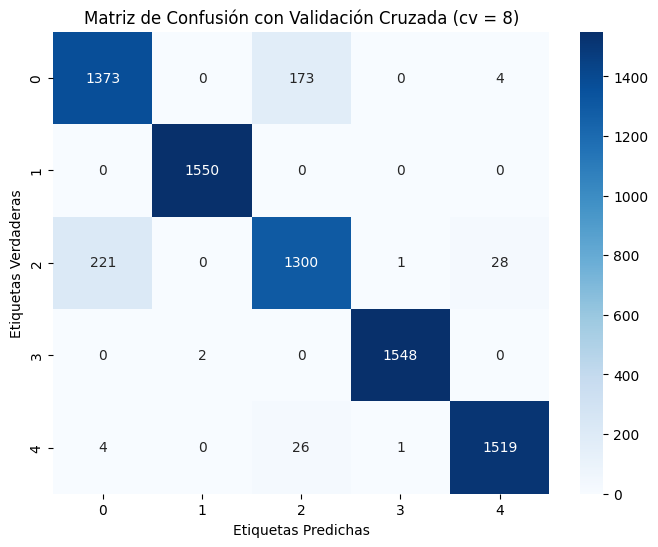

Exactitud media: 0.9406451612903226
Precisión media: 0.9406465991682965
Recall media: 0.9406451612903226
Puntuación F1 media: 0.9405574761523031
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_9.png


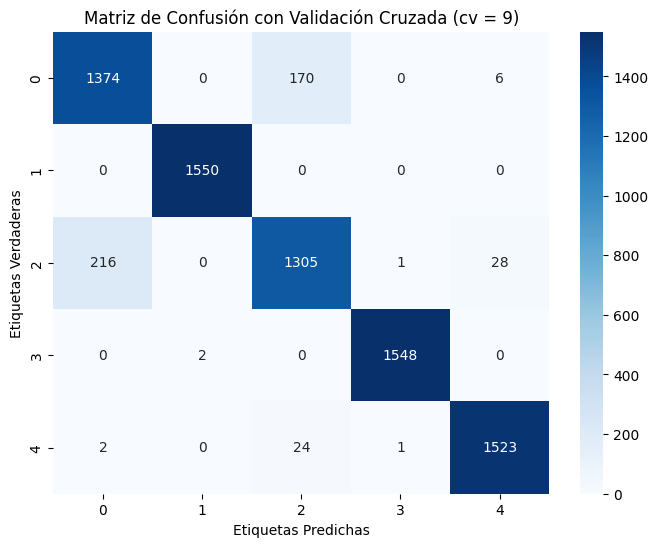

Exactitud media: 0.9419354838709677
Precisión media: 0.9418459730831642
Recall media: 0.9419354838709677
Puntuación F1 media: 0.9418104752838544
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_10.png


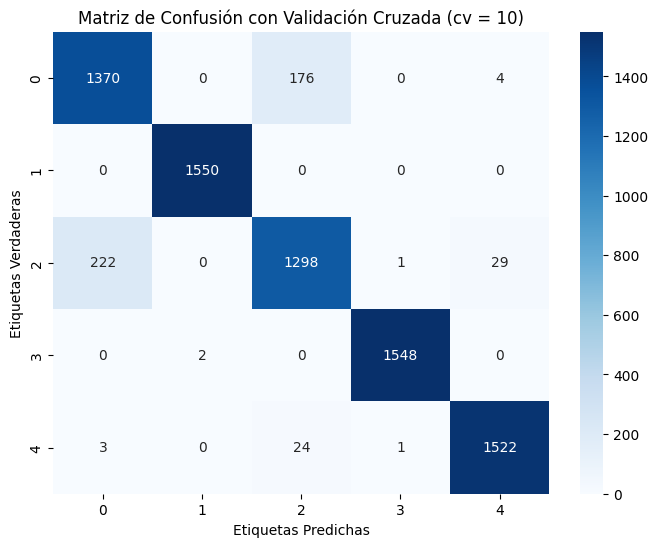

Exactitud media: 0.9403870967741935
Precisión media: 0.9403243946976299
Recall media: 0.9403870967741935
Puntuación F1 media: 0.9402698802983532
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_9_vecinos/KNN_llama3_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_simple_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.1.png


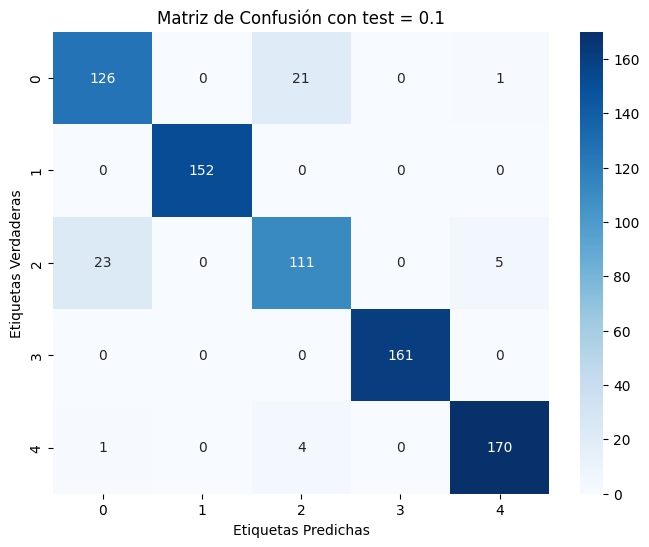

Exactitud del modelo: 0.9290322580645162
Precisión del modelo: 0.9287775746075556
Recall del modelo: 0.9290322580645162
Puntuación F1 del modelo: 0.9288786335776593
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.2.png


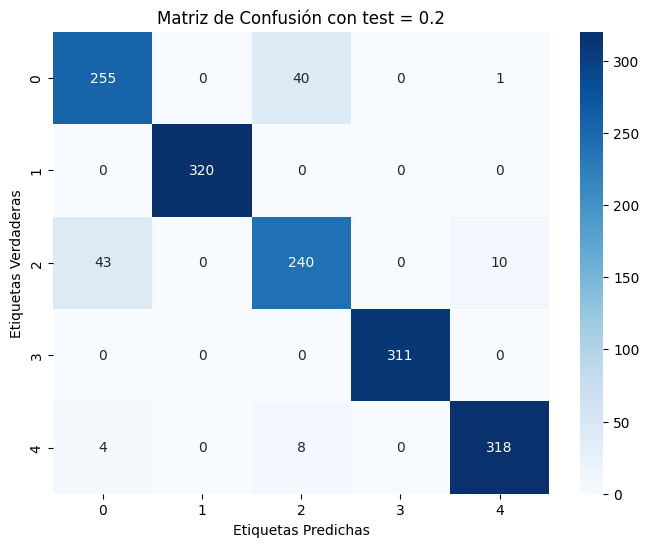

Exactitud del modelo: 0.9316129032258065
Precisión del modelo: 0.9316561334520309
Recall del modelo: 0.9316129032258065
Puntuación F1 del modelo: 0.9316060808800624
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.3.png


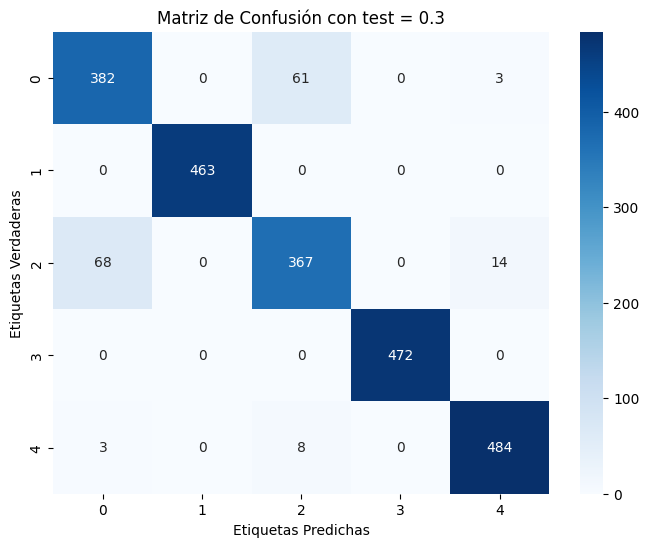

Exactitud del modelo: 0.9324731182795699
Precisión del modelo: 0.9321476918742605
Recall del modelo: 0.9324731182795699
Puntuación F1 del modelo: 0.9322584437778827
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.4.png


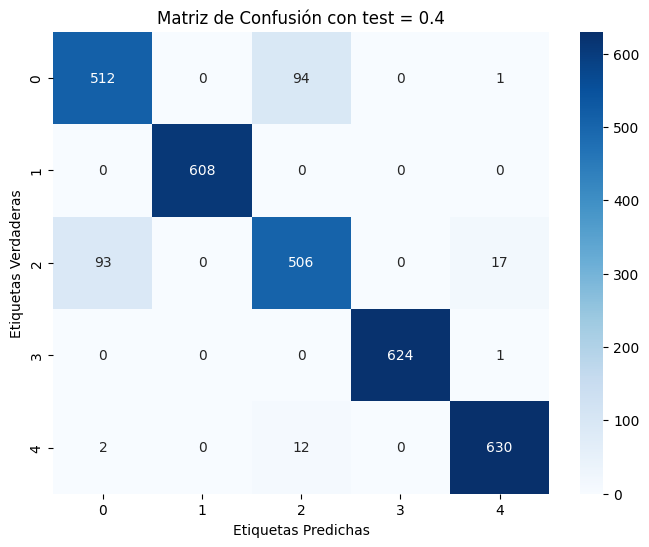

Exactitud del modelo: 0.9290322580645162
Precisión del modelo: 0.9288559898668284
Recall del modelo: 0.9290322580645162
Puntuación F1 del modelo: 0.9289392300816799
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.5.png


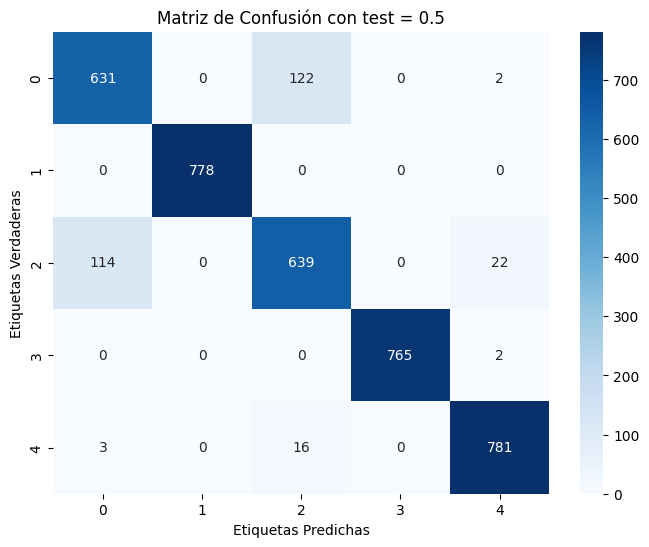

Exactitud del modelo: 0.927483870967742
Precisión del modelo: 0.9273511791512257
Recall del modelo: 0.927483870967742
Puntuación F1 del modelo: 0.9274095583765417
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.6.png


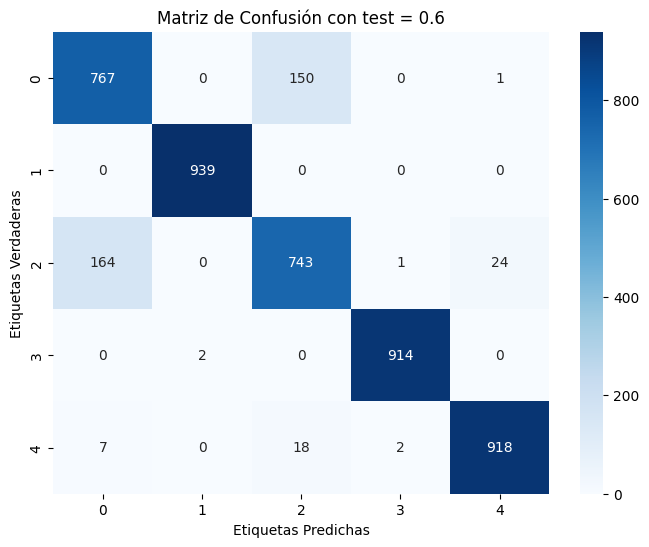

Exactitud del modelo: 0.9206451612903226
Precisión del modelo: 0.9205866426029959
Recall del modelo: 0.9206451612903226
Puntuación F1 del modelo: 0.9205754595773148
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.7.png


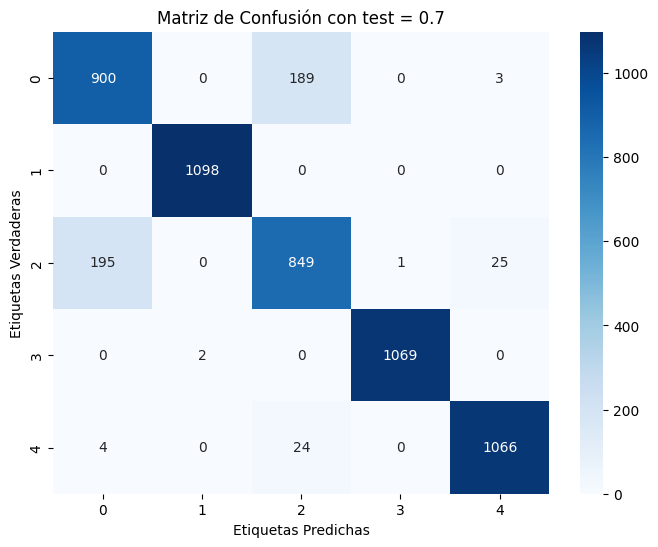

Exactitud del modelo: 0.9183410138248848
Precisión del modelo: 0.9182793913241941
Recall del modelo: 0.9183410138248848
Puntuación F1 del modelo: 0.9183060923572482
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.8.png


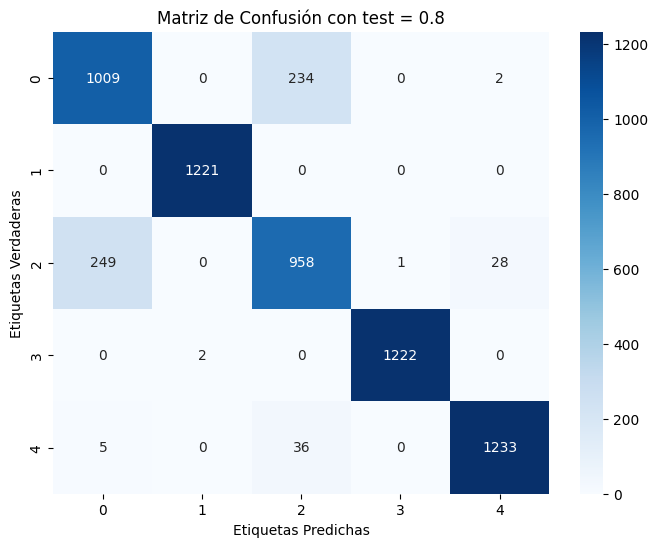

Exactitud del modelo: 0.9101612903225806
Precisión del modelo: 0.9104197040586244
Recall del modelo: 0.9101612903225806
Puntuación F1 del modelo: 0.9102766203542205
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.9.png


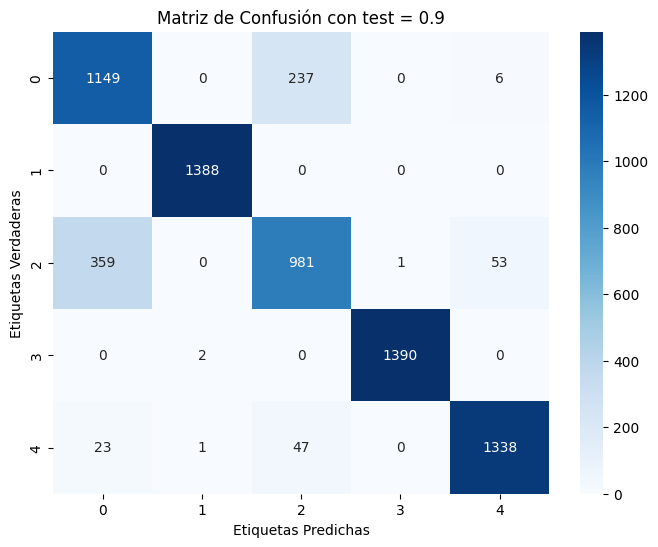

Exactitud del modelo: 0.895483870967742
Precisión del modelo: 0.896232199770579
Recall del modelo: 0.895483870967742
Puntuación F1 del modelo: 0.8951507379204586
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_11_vecinos/KNN_llama3_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_cruz_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_2.png


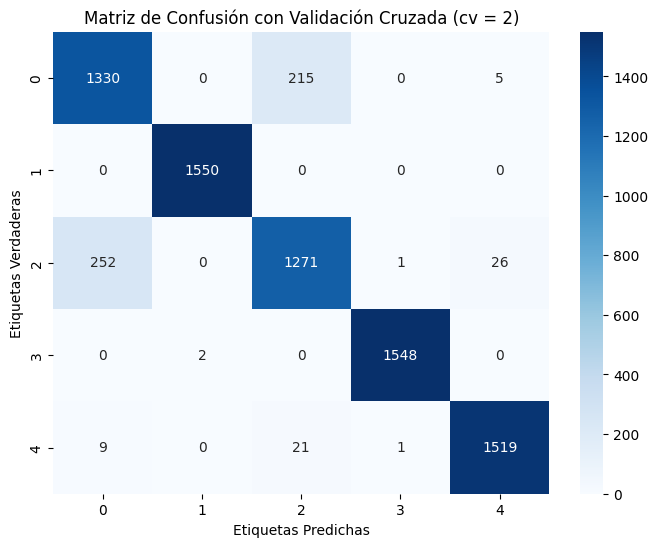

Exactitud media: 0.9313548387096774
Precisión media: 0.9313541454721168
Recall media: 0.9313548387096774
Puntuación F1 media: 0.931292634393447
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_3.png


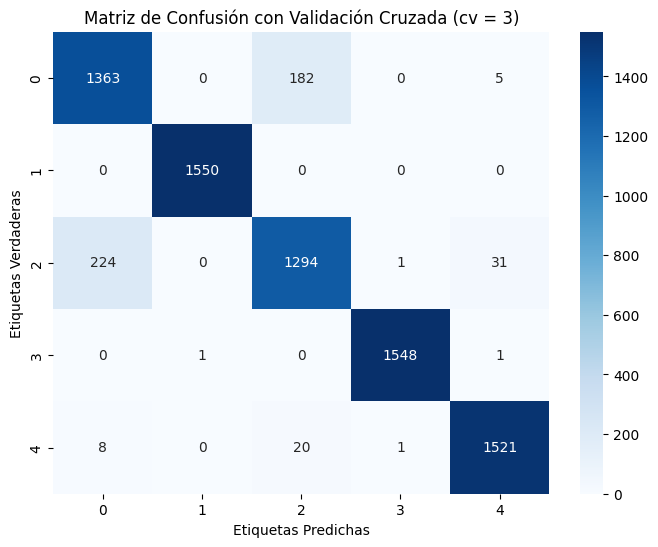

Exactitud media: 0.9388387096774193
Precisión media: 0.9387670506585215
Recall media: 0.9388387096774193
Puntuación F1 media: 0.9387126410442741
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_4.png


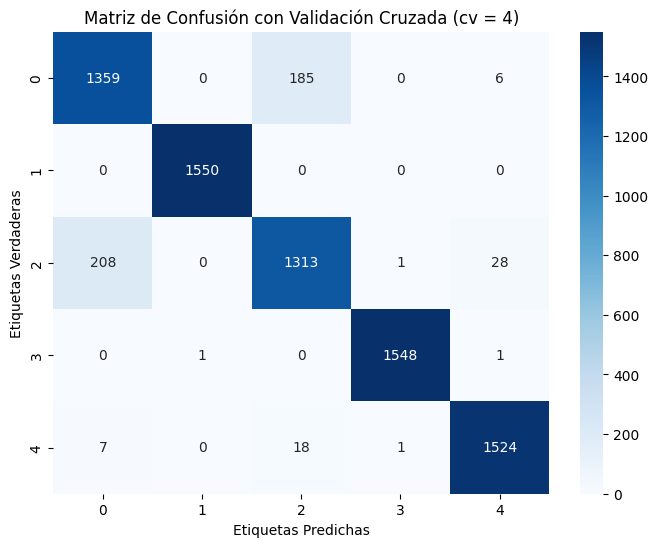

Exactitud media: 0.9411612903225807
Precisión media: 0.9410229933952611
Recall media: 0.9411612903225807
Puntuación F1 media: 0.9410591395548781
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_5.png


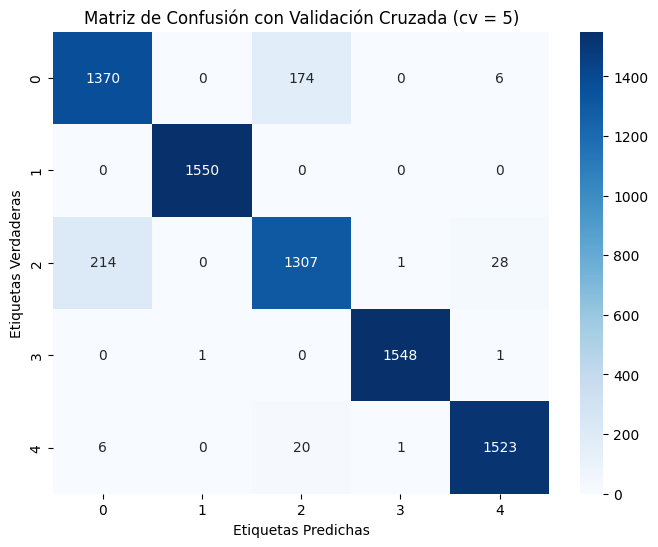

Exactitud media: 0.9416774193548387
Precisión media: 0.9415976570668108
Recall media: 0.9416774193548387
Puntuación F1 media: 0.9415636837032038
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_6.png


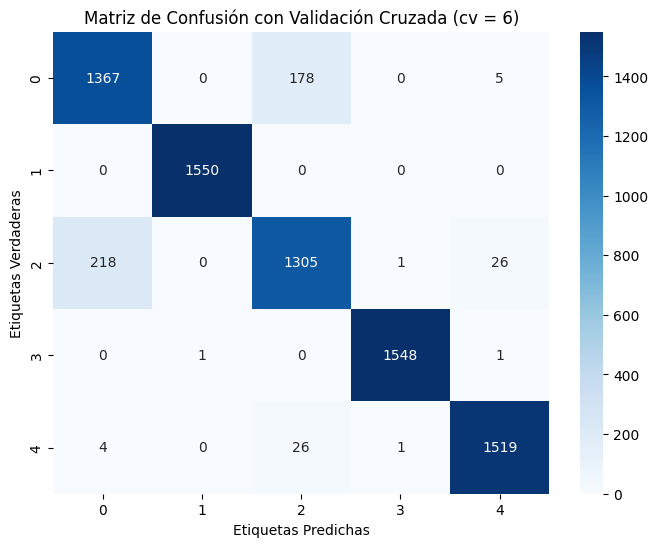

Exactitud media: 0.9405161290322581
Precisión media: 0.9405067410241813
Recall media: 0.9405161290322581
Puntuación F1 media: 0.940453839745236
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_7.png


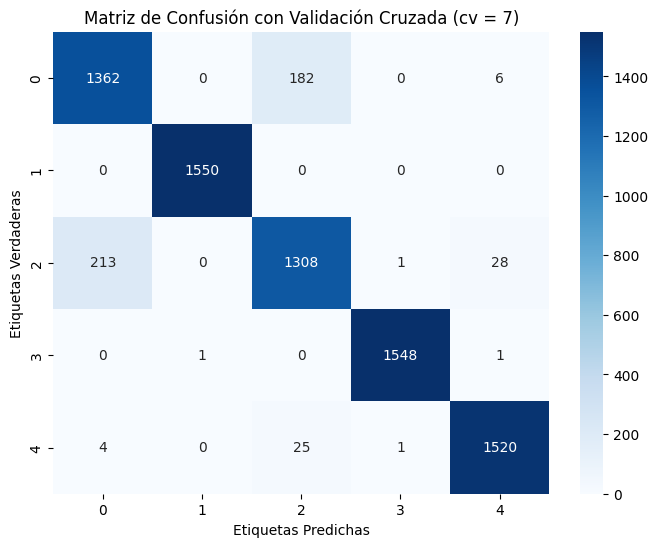

Exactitud media: 0.9403870967741935
Precisión media: 0.9402988955534582
Recall media: 0.9403870967741935
Puntuación F1 media: 0.9403052480448325
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_8.png


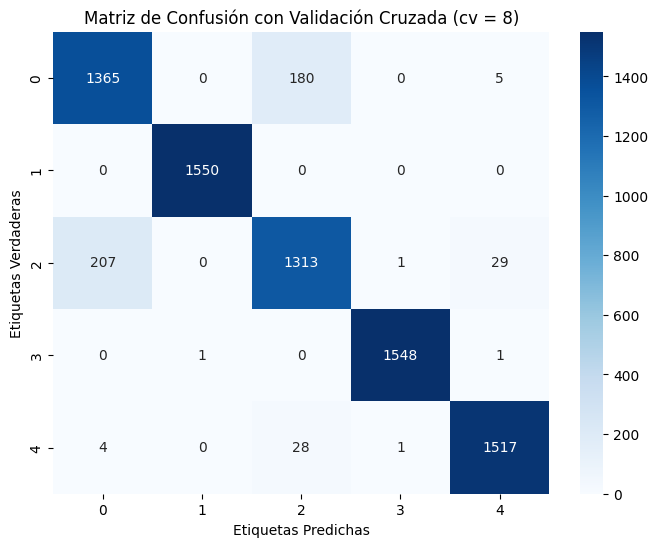

Exactitud media: 0.9410322580645162
Precisión media: 0.9409756000437809
Recall media: 0.9410322580645162
Puntuación F1 media: 0.9409764914143985
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_9.png


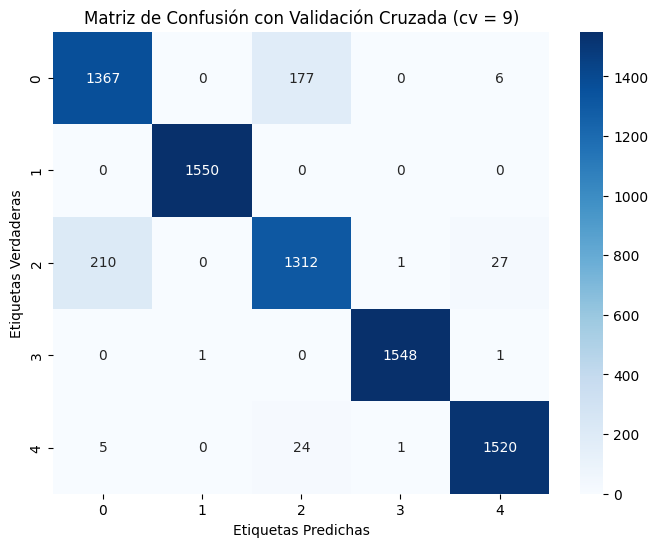

Exactitud media: 0.9415483870967742
Precisión media: 0.9414866692097937
Recall media: 0.9415483870967742
Puntuación F1 media: 0.9414739507741118
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_10.png


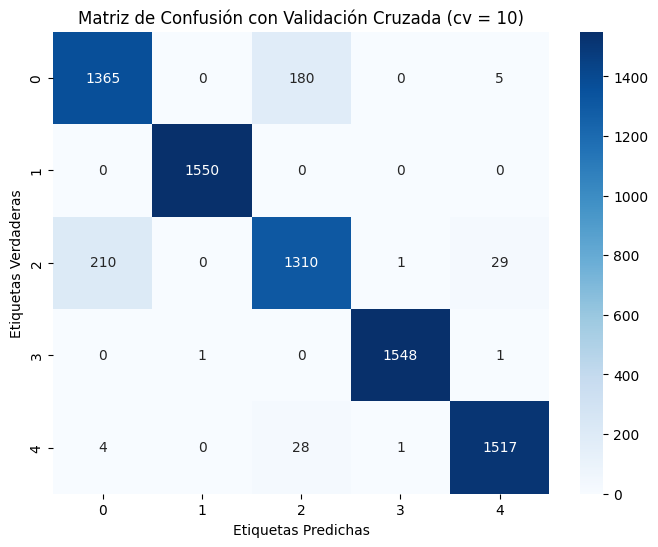

Exactitud media: 0.9406451612903226
Precisión media: 0.9405924344207799
Recall media: 0.9406451612903226
Puntuación F1 media: 0.9405851226295552
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_11_vecinos/KNN_llama3_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_simple_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.1.png


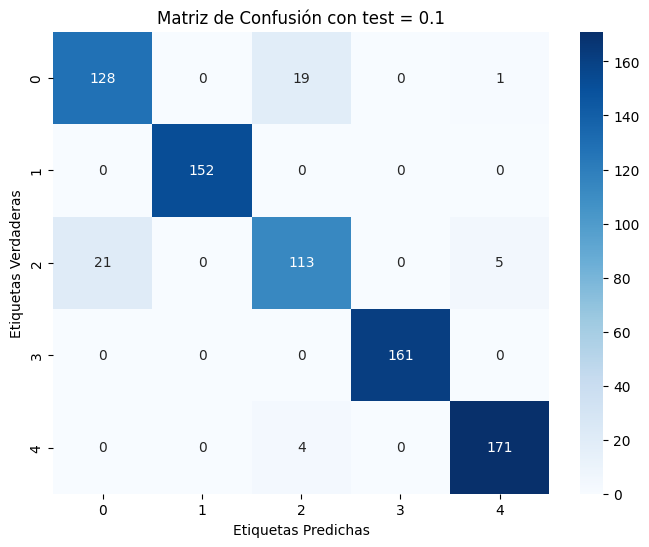

Exactitud del modelo: 0.9354838709677419
Precisión del modelo: 0.9350985590533012
Recall del modelo: 0.9354838709677419
Puntuación F1 del modelo: 0.9352647224937548
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.2.png


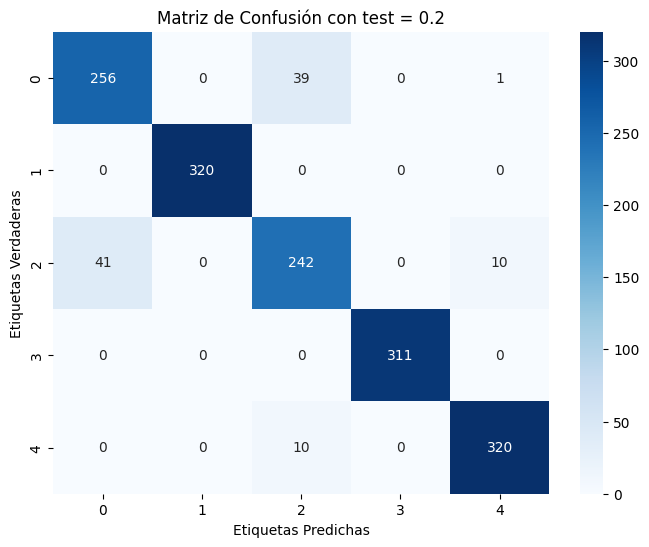

Exactitud del modelo: 0.9348387096774193
Precisión del modelo: 0.9347319419399972
Recall del modelo: 0.9348387096774193
Puntuación F1 del modelo: 0.934782547704473
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.3.png


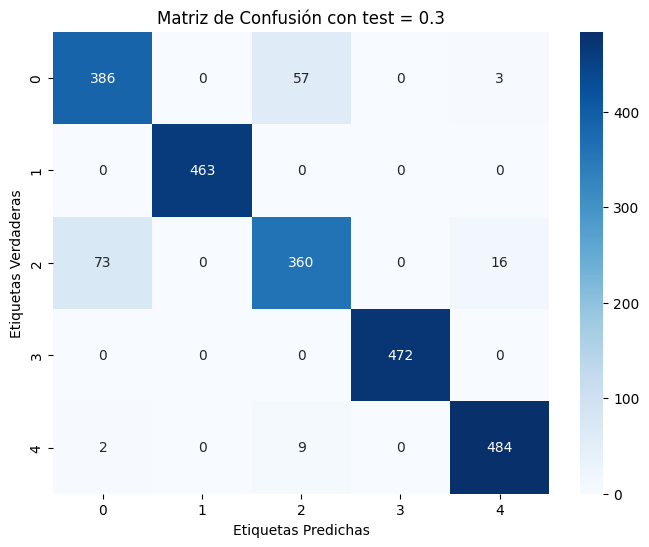

Exactitud del modelo: 0.9311827956989247
Precisión del modelo: 0.9308297435133853
Recall del modelo: 0.9311827956989247
Puntuación F1 del modelo: 0.9308384581308125
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.4.png


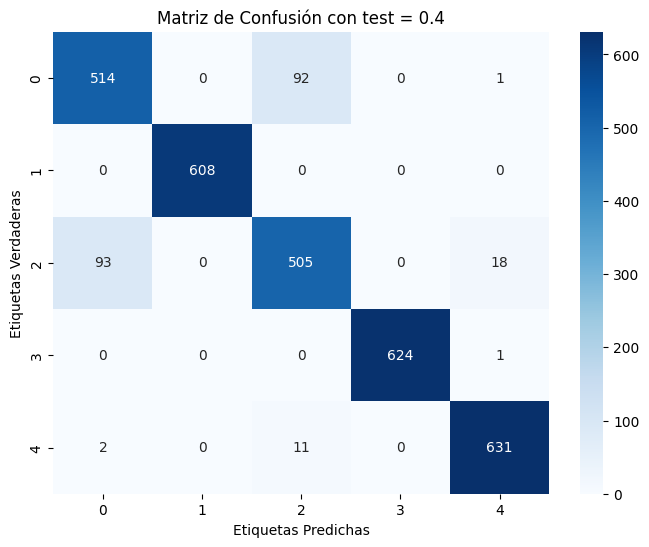

Exactitud del modelo: 0.9296774193548387
Precisión del modelo: 0.9294102507965345
Recall del modelo: 0.9296774193548387
Puntuación F1 del modelo: 0.9295303379764072
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.5.png


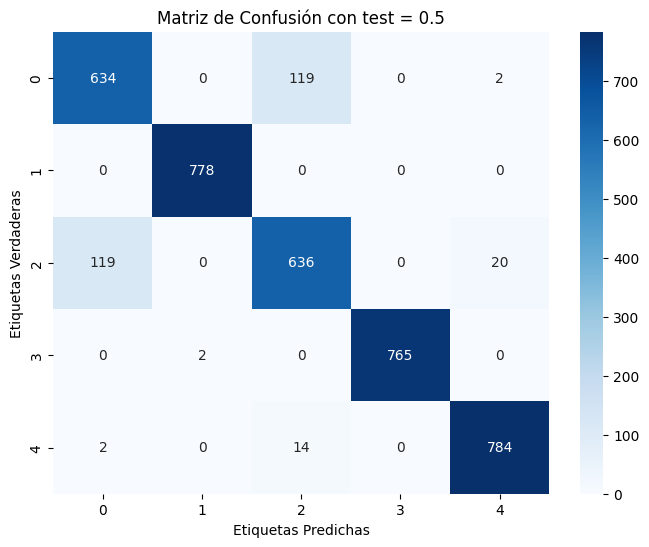

Exactitud del modelo: 0.928258064516129
Precisión del modelo: 0.9280338551235853
Recall del modelo: 0.928258064516129
Puntuación F1 del modelo: 0.928139990868491
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.6.png


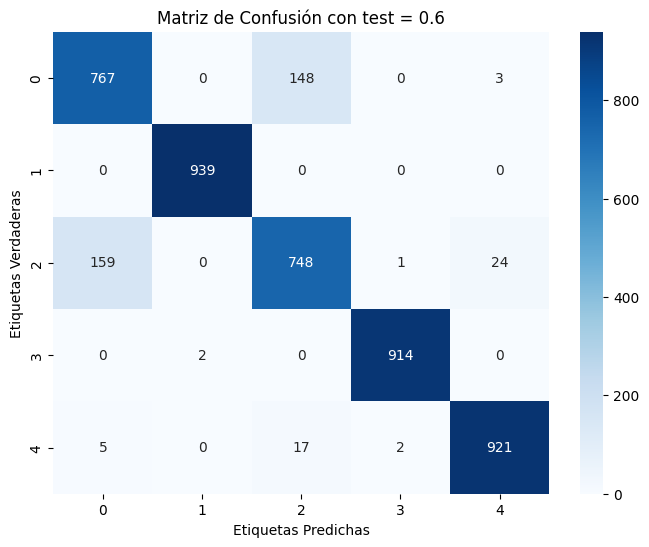

Exactitud del modelo: 0.9223655913978495
Precisión del modelo: 0.9221396217578499
Recall del modelo: 0.9223655913978495
Puntuación F1 del modelo: 0.9222264894872082
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.7.png


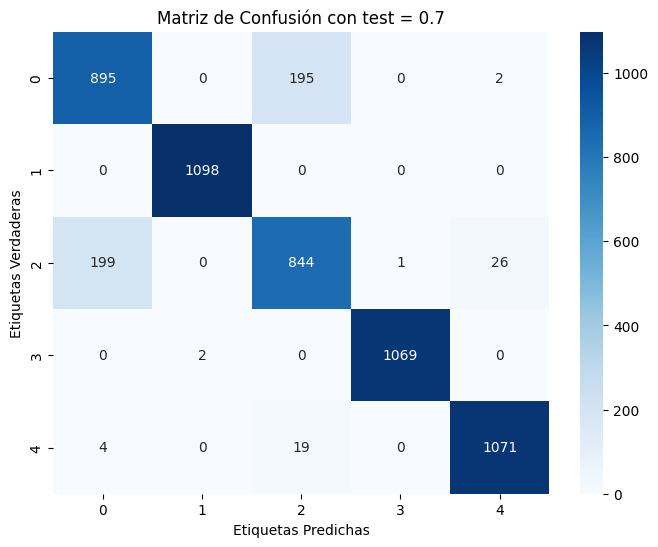

Exactitud del modelo: 0.9174193548387096
Precisión del modelo: 0.9172003979289757
Recall del modelo: 0.9174193548387096
Puntuación F1 del modelo: 0.9173024318059942
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.8.png


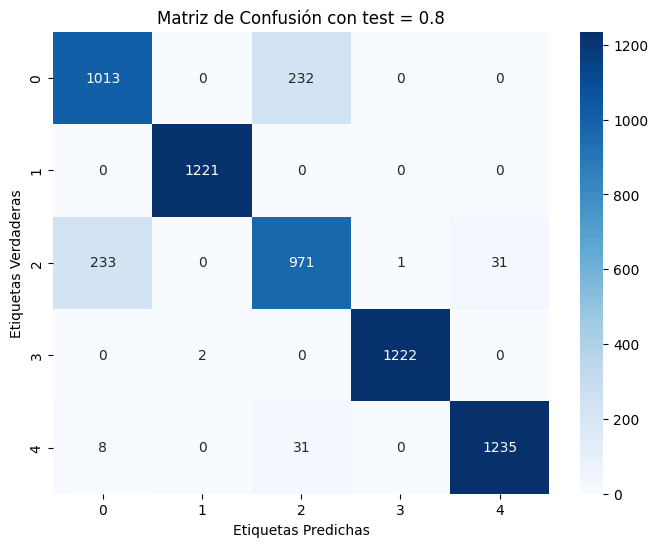

Exactitud del modelo: 0.9132258064516129
Precisión del modelo: 0.9134048337747419
Recall del modelo: 0.9132258064516129
Puntuación F1 del modelo: 0.9133109588110839
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.9.png


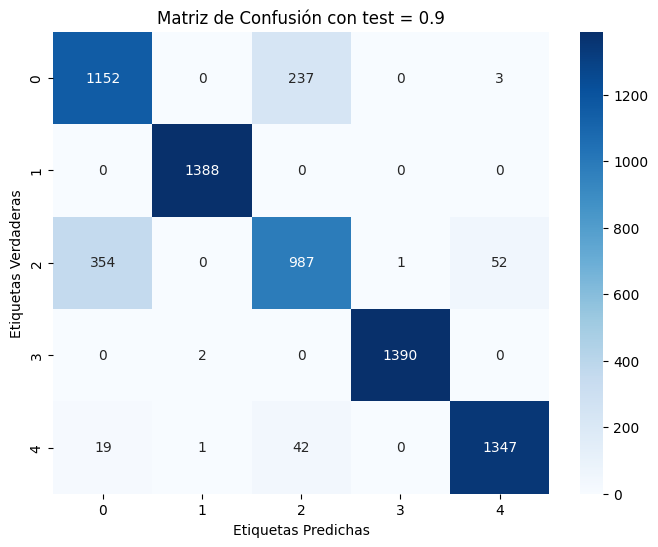

Exactitud del modelo: 0.8980645161290323
Precisión del modelo: 0.8986456063874406
Recall del modelo: 0.8980645161290323
Puntuación F1 del modelo: 0.8976809953158156
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_simple_13_vecinos/KNN_llama3_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Se creó la carpeta KNN_llama3_embeddings_val_cruz_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_2.png


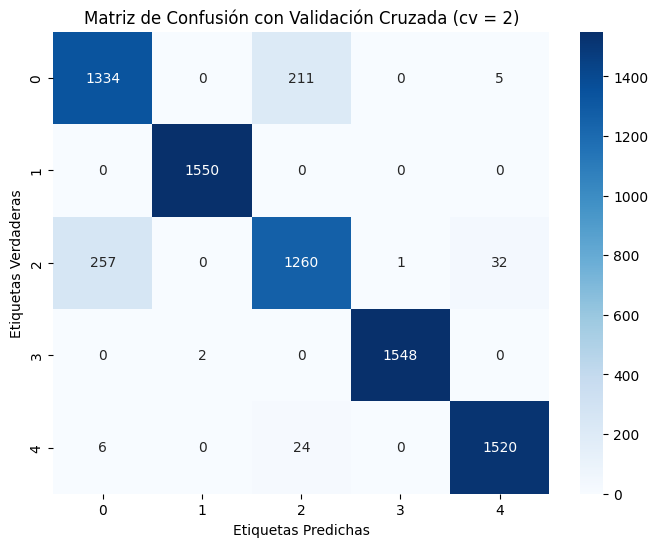

Exactitud media: 0.9305806451612904
Precisión media: 0.9304855393660061
Recall media: 0.9305806451612904
Puntuación F1 media: 0.9304401490033503
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_3.png


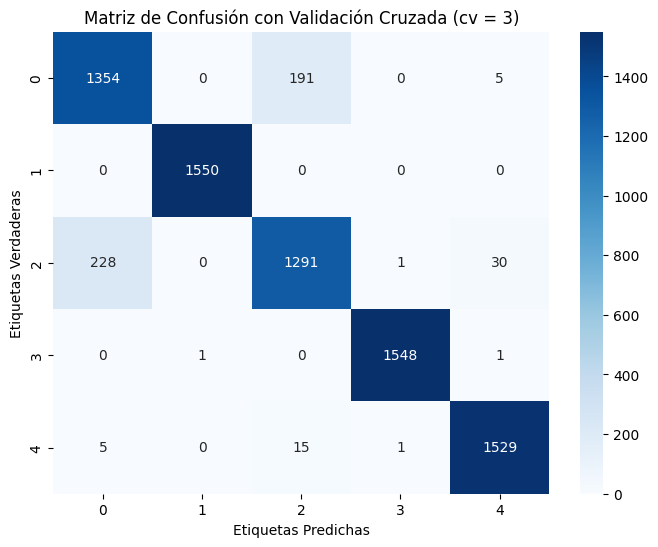

Exactitud media: 0.9383225806451613
Precisión media: 0.9381270582742502
Recall media: 0.9383225806451613
Puntuación F1 media: 0.9381449320721924
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_4.png


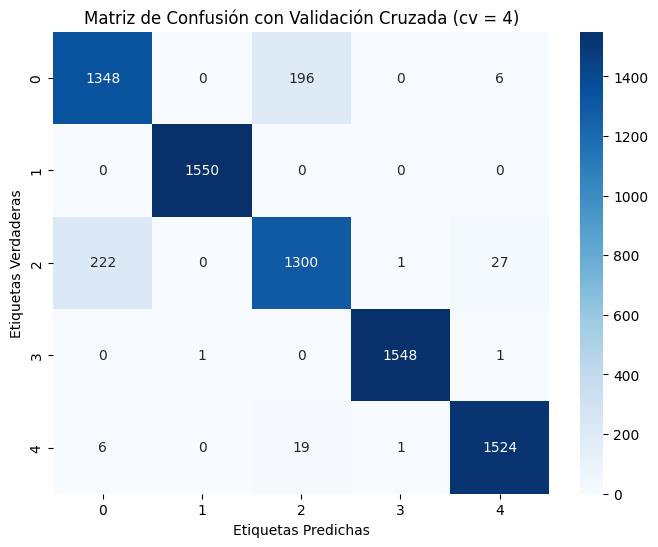

Exactitud media: 0.9380645161290323
Precisión media: 0.9379315680211499
Recall media: 0.9380645161290323
Puntuación F1 media: 0.9379626623938665
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_5.png


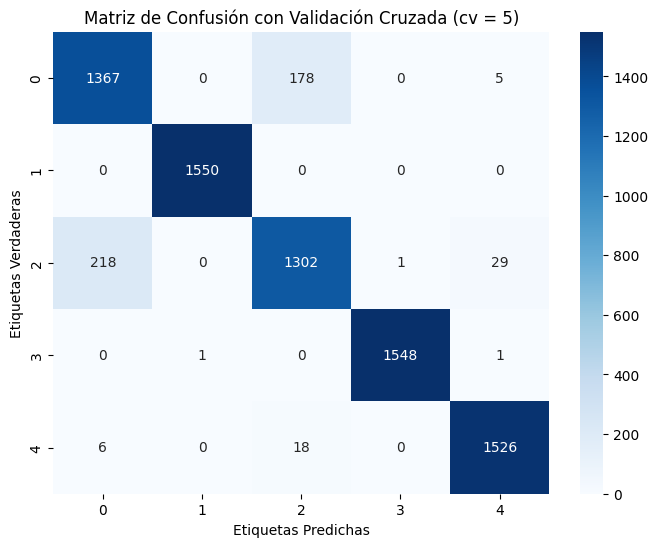

Exactitud media: 0.9410322580645162
Precisión media: 0.9409310151955664
Recall media: 0.9410322580645162
Puntuación F1 media: 0.9408997293647117
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_6.png


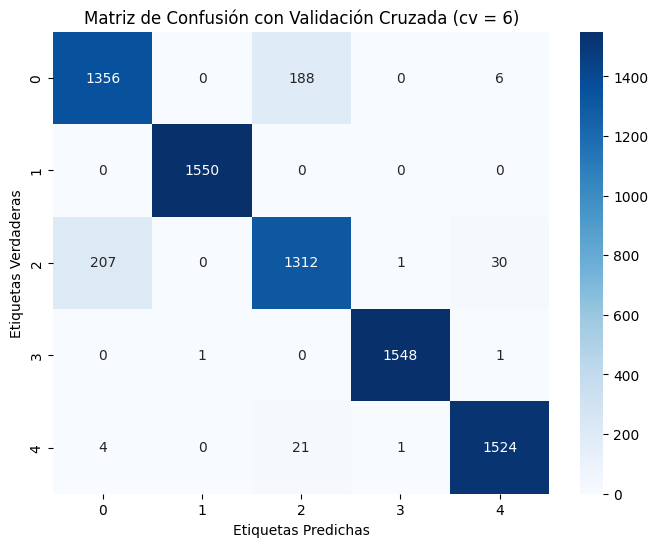

Exactitud media: 0.9406451612903226
Precisión media: 0.9404600753684036
Recall media: 0.9406451612903226
Puntuación F1 media: 0.9405297312568723
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_7.png


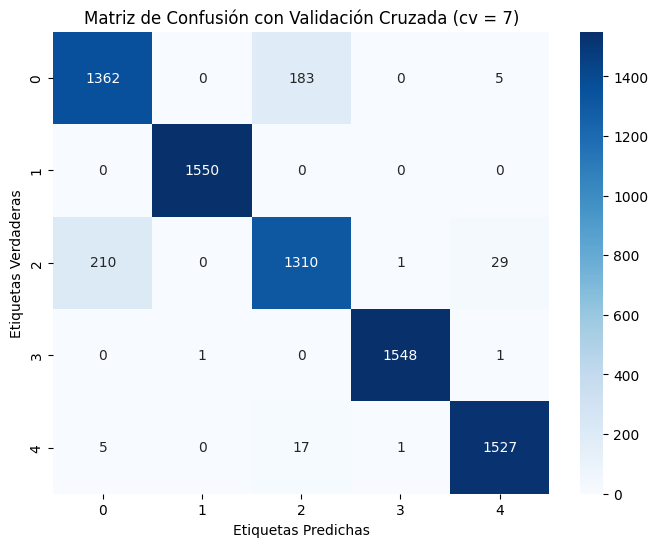

Exactitud media: 0.9415483870967742
Precisión media: 0.9413745235474963
Recall media: 0.9415483870967742
Puntuación F1 media: 0.94141626012076
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_8.png


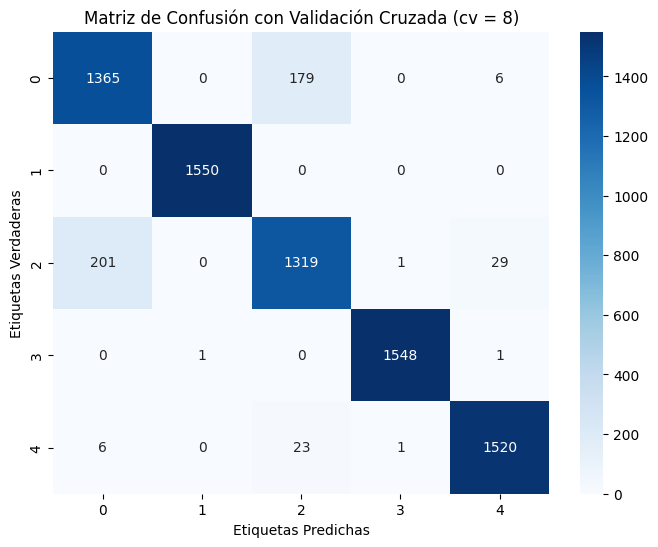

Exactitud media: 0.9421935483870968
Precisión media: 0.9420883864835109
Recall media: 0.9421935483870968
Puntuación F1 media: 0.942116209894244
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_9.png


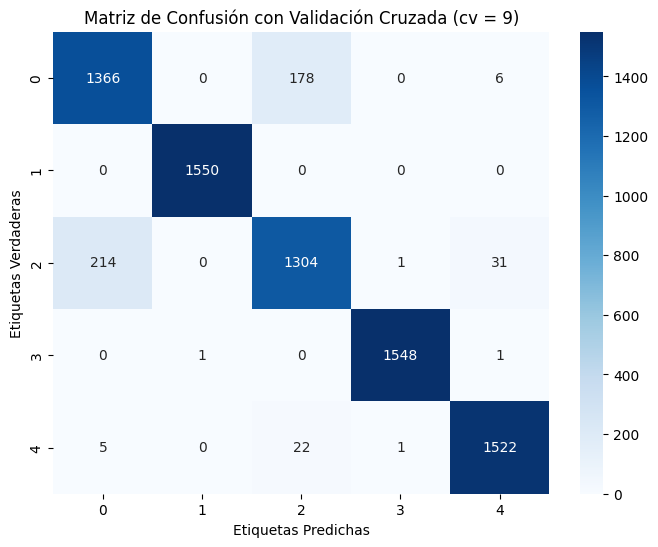

Exactitud media: 0.9406451612903226
Precisión media: 0.9405113774654749
Recall media: 0.9406451612903226
Puntuación F1 media: 0.9405157417071748
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
La carpeta KNN_llama3_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama3
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_10.png


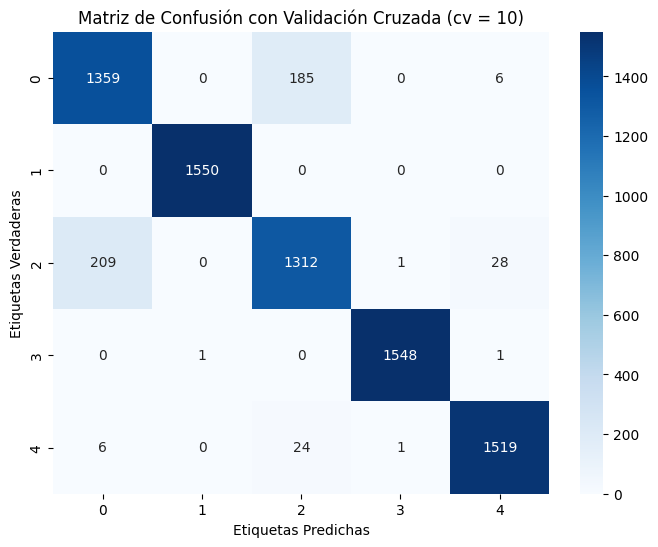

Exactitud media: 0.9403870967741935
Precisión media: 0.9403076294689808
Recall media: 0.9403870967741935
Puntuación F1 media: 0.940321506548988
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama3/KNN_llama3_embeddings_val_cruz_13_vecinos/KNN_llama3_embeddings_val_cruz.json


In [5]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/KNN_llama3_embeddings_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/KNN_llama3_embeddings_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}


lista = [3,5,7,9,11,13]

for numero in lista: 
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = knn_classification(datos,numero,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = knn_classification(datos,numero,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)